## Python notebook template block B

As of now, you created a new notebook for every study day with the related contents. However, when working on a project in the real life, all your data and code needs to be in one place for the project. Going forward in the block, all of the code that you generate with regard to the final project about NAC and the ILO's should be in this one template. Go back to the code you wrote for the previous weeks, evaluate if it is according to [PEP8](https://peps.python.org/pep-0008/) style guide and adjust where necessary. This template provides you with a natural flow through the steps of a traditional data science project. Do not forget to clearly add comments to your code. If you would like to add more stucture, add extra mark down blocks to explain what you are doing. You are **not** allowed to remove code blocks! All blocks in here need to be filled with code. If you did not write code for a section, leave the code block as is with the pre-filled in comment. Adjust this template to your needs, make sure that all your evidence for all of the ILO's is included.

⚠️Important! Before handing it in, run all of your code. All your cells need to show outputs. This is necessary for grading!⚠️

The ILO's for which you can evidence your code by this notebook are: 

| ILO | Poor | Insufficient | Sufficient | Good | Excellent |
|-----|------|--------------|------------|------|-----------|
| 4.1 | x    | x            | x          | x    | x         |
| 4.2 | x    | x            | x          | x    | x*        |
| 5.0 | x    | x            | x          | x    | x         |
| 7.0 | x    | x            | x          | x    | x         |

4.2 excellent*: If you would like to showcast your graphs using streamlit, you need to hand in a seperate .py file. Evidence accordingly in your learning log.




### Add imports here
When working in .py files, you usually have all your package imports at the top of your code. This makes it easy to get a good overview of the packages that you are using and importing. As of now, we are working in .ipynb, but it is good practice to already start implementing these structures. Add all the imports that you use in all of your code in the code block below. In this way, you do not need to add it in every cell.

In [1]:
# Add your package imports here
import pandas as pd
import os
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from numpy import mean, absolute
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from getpass import getpass
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### Load the data

After your package imports, you usually load your data. This is what you will be working with and what your code will be based on.

This here is the final dataset I will use for the whole analysis

In [2]:
nacdata = pd.read_csv(r'C:\Users\victo\Downloads\blockB\2023-24b-fai1-adsai-VictoriaVicheva233182\Deliverables\NAC DATAaaaaaa.csv')
nacdata

,Unnamed: 0,Player,Team,Team within selected timeframe,Position,Age,Market value,Contract expires,Matches played,Minutes played,...,Prevented goals per 90,Back passes received as GK per 90,Exits per 90,Aerial duels per 90.1,Free kicks per 90,Direct free kicks per 90,"Direct free kicks on target, %",Corners per 90,Penalties taken,"Penalty conversion, %"
0,0,S. Baidoo,Salzburg,Liefering,"RCB, LCB",19.0,1000000,30/06/2027,21,1986,...,NaN,1.45,NaN,NaN,0.00,0.00,0.0,0.00,0,0.0
1,1,M. Seidl,Rapid Wien,Blau-Weiß Linz,"LWF, RWF, AMF",22.0,1000000,30/06/2024,26,2293,...,NaN,0.24,NaN,NaN,0.39,0.31,0.0,0.12,0,0.0
2,2,B. Okoh,Salzburg,Liefering,"LCB, RCB",20.0,1000000,30/06/2025,8,476,...,NaN,1.32,NaN,NaN,0.00,0.00,0.0,0.00,0,0.0
3,3,B. Koumetio,Austria Wien,Austria Wien II,LCB,20.0,600000,30/06/2025,4,389,...,NaN,3.70,NaN,NaN,0.00,0.00,0.0,0.00,0,0.0
4,4,M. Polster,Austria Wien,Austria Wien II,"LB, LAMF",20.0,600000,30/06/2025,5,464,...,NaN,0.39,NaN,NaN,0.00,0.00,0.0,0.00,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16530,295,I. Shamoun,Eskilstuna,Eskilstuna,"LCMF, RCMF, LDMF",20.0,0,NaN,20,903,...,NaN,0.00,NaN,NaN,1.00,0.10,0.0,1.30,0,0.0
16531,296,Z. Fryers,Eskilstuna,Eskilstuna,"LB, LCB",30.0,0,31/12/2023,15,969,...,NaN,0.93,NaN,NaN,0.00,0.00,0.0,0.00,0,0.0
16532,297,A. Al-Hamawi,Helsingborg,Helsingborg,"CF, LWF, LW",19.0,0,NaN,21,1588,...,NaN,0.00,NaN,NaN,0.28,0.28,20.0,0.00,0,0.0
16533,298,L. Kjellnäs,Helsingborgs U21,Helsingborg,"LCMF, RCMF, LW",19.0,0,NaN,9,442,...,NaN,0.41,NaN,NaN,0.00,0.00,0.0,0.00,0,0.0


## Data Management and Understanding

Here, I will apply this code to understand the data that I am going to work with

In [3]:
final_combined_df = pd.read_csv(r'C:\Users\victo\Downloads\blockB\2023-24b-fai1-adsai-VictoriaVicheva233182\Deliverables\NAC DATA1.csv') # This is the first csv after combining the given folder (2022-2023)

numerical_columns = final_combined_df.select_dtypes(include=['number']).columns
num_numerical_variables = len(numerical_columns)
catg_columns = final_combined_df.select_dtypes(include=['object', 'category']).columns
numberOf_catgValues = len(catg_columns)

print(final_combined_df.shape)
print(f"Number of categorical variables: {numberOf_catgValues}")
print(f"Number of numerical variables: {num_numerical_variables}")

(16535, 115)
Number of categorical variables: 9
Number of numerical variables: 106


Indicating the columns with missing data: 

In [4]:
missing_values_per_column = final_combined_df.isnull().sum()

columns_with_missing_values = missing_values_per_column[missing_values_per_column > 0]

print("Columns with missing values:")
print(columns_with_missing_values.to_string())

Columns with missing values:
Team                                      625
Position                                   56
Age                                         8
Contract expires                         7064
Duels per 90                              232
Duels won, %                              232
Birth country                               5
Passport country                            2
Foot                                     1074
Successful defensive actions per 90       232
Defensive duels per 90                    232
Defensive duels won, %                    232
Aerial duels per 90                       232
Aerial duels won, %                       232
Sliding tackles per 90                    232
Shots blocked per 90                      232
Interceptions per 90                      232
Fouls per 90                              232
Yellow cards per 90                       174
Red cards per 90                          174
Successful attacking actions per 90       232
Goals

### Data Cleansing
In the following section plug in all of your relevant python codes and explanations related to data cleansing. This is related to the poor and insufficient criteria of ILO 4.1 and 4.2.

Cleansing the categorical data from the NAC dataset: 

In [5]:
def handle_missing_text_data(final_combined_df):
    text_columns = final_combined_df.select_dtypes(include=['object', 'category']).columns

    filled_text_columns_df = final_combined_df[text_columns].fillna('No data')

    filled_text_columns_df.to_csv('filled_text_columns.csv', index=False)

    return filled_text_columns_df

filled_text_columns_df = handle_missing_text_data(final_combined_df)

print("\nFilled Text Columns:")
print(filled_text_columns_df.head())


Filled Text Columns:
        Player          Team Team within selected timeframe       Position  \
0    S. Baidoo      Salzburg                      Liefering       RCB, LCB   
1     M. Seidl    Rapid Wien                 Blau-Weiß Linz  LWF, RWF, AMF   
2      B. Okoh      Salzburg                      Liefering       LCB, RCB   
3  B. Koumetio  Austria Wien                Austria Wien II            LCB   
4   M. Polster  Austria Wien                Austria Wien II       LB, LAMF   

  Contract expires  Birth country            Passport country   Foot On loan  
0       30/06/2027        Austria                     Austria  right      no  
1       30/06/2024        Austria                     Austria  right      no  
2       30/06/2025  United States  United States, Switzerland   left      no  
3       30/06/2025         France            France, Cameroon   left     yes  
4       30/06/2025        Austria                     Austria   left      no  


Cleansing the numerical data from the NAC dataset: 

In [6]:
def handle_missing_numerical_data(final_combined_df):
    numerical_columns = final_combined_df.select_dtypes(include=['number']).columns

    filled_numerical_columns_df = final_combined_df[numerical_columns].fillna(final_combined_df[numerical_columns].mean())

    filled_numerical_columns_df.to_csv('filled_numerical_columns.csv', index=False)

    return filled_numerical_columns_df


filled_numerical_columns_df = handle_missing_numerical_data(final_combined_df)
print("\nFilled Numerical Columns:")
print(filled_numerical_columns_df.head(2))


Filled Numerical Columns:
   Unnamed: 0   Age  Market value  Matches played  Minutes played  Goals  \
0           0  19.0       1000000              21            1986      1   
1           1  22.0       1000000              26            2293     12   

      xG  Assists    xA  Duels per 90  ...  Prevented goals per 90  \
0   1.22        0  0.23         18.17  ...               -0.051434   
1  10.90        3  4.40         22.69  ...               -0.051434   

   Back passes received as GK per 90  Exits per 90  Aerial duels per 90.1  \
0                               1.45      1.488357                0.44043   
1                               0.24      1.488357                0.44043   

   Free kicks per 90  Direct free kicks per 90  \
0               0.00                      0.00   
1               0.39                      0.31   

   Direct free kicks on target, %  Corners per 90  Penalties taken  \
0                             0.0            0.00                0   
1         

Single Source of data: 

Here I will show how I merged all of the excel file into one big .csv file.

In [7]:
def combine_and_save_filled_data(filled_numerical_df, filled_text_df, output_file='combined_filled_data.csv'):

    combined_filled_df = pd.concat([filled_text_df, filled_numerical_df], axis=1)
    combined_filled_df.to_csv(output_file, index=False)

    print(f"Combined DataFrame saved to {output_file}")
    print(f"Shape of Combined DataFrame: {combined_filled_df.shape}")

    return combined_filled_df

combine_and_save_filled_data(filled_numerical_columns_df, filled_text_columns_df)

Combined DataFrame saved to combined_filled_data.csv
Shape of Combined DataFrame: (16535, 115)


,Player,Team,Team within selected timeframe,Position,Contract expires,Birth country,Passport country,Foot,On loan,Unnamed: 0,...,Prevented goals per 90,Back passes received as GK per 90,Exits per 90,Aerial duels per 90.1,Free kicks per 90,Direct free kicks per 90,"Direct free kicks on target, %",Corners per 90,Penalties taken,"Penalty conversion, %"
0,S. Baidoo,Salzburg,Liefering,"RCB, LCB",30/06/2027,Austria,Austria,right,no,0,...,-0.051434,1.45,1.488357,0.44043,0.00,0.00,0.0,0.00,0,0.0
1,M. Seidl,Rapid Wien,Blau-Weiß Linz,"LWF, RWF, AMF",30/06/2024,Austria,Austria,right,no,1,...,-0.051434,0.24,1.488357,0.44043,0.39,0.31,0.0,0.12,0,0.0
2,B. Okoh,Salzburg,Liefering,"LCB, RCB",30/06/2025,United States,"United States, Switzerland",left,no,2,...,-0.051434,1.32,1.488357,0.44043,0.00,0.00,0.0,0.00,0,0.0
3,B. Koumetio,Austria Wien,Austria Wien II,LCB,30/06/2025,France,"France, Cameroon",left,yes,3,...,-0.051434,3.70,1.488357,0.44043,0.00,0.00,0.0,0.00,0,0.0
4,M. Polster,Austria Wien,Austria Wien II,"LB, LAMF",30/06/2025,Austria,Austria,left,no,4,...,-0.051434,0.39,1.488357,0.44043,0.00,0.00,0.0,0.00,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16530,I. Shamoun,Eskilstuna,Eskilstuna,"LCMF, RCMF, LDMF",No data,Sweden,Sweden,right,no,295,...,-0.051434,0.00,1.488357,0.44043,1.00,0.10,0.0,1.30,0,0.0
16531,Z. Fryers,Eskilstuna,Eskilstuna,"LB, LCB",31/12/2023,England,England,left,no,296,...,-0.051434,0.93,1.488357,0.44043,0.00,0.00,0.0,0.00,0,0.0
16532,A. Al-Hamawi,Helsingborg,Helsingborg,"CF, LWF, LW",No data,Iraq,"Iraq, Sweden",right,no,297,...,-0.051434,0.00,1.488357,0.44043,0.28,0.28,20.0,0.00,0,0.0
16533,L. Kjellnäs,Helsingborgs U21,Helsingborg,"LCMF, RCMF, LW",No data,Sweden,Sweden,No data,no,298,...,-0.051434,0.41,1.488357,0.44043,0.00,0.00,0.0,0.00,0,0.0


Here I will check one more time if there are any missing values:

In [8]:
filled_numerical_df = pd.read_csv('combined_filled_data.csv')

missing_values = filled_numerical_df.isnull().sum()

columns_with_missing_values = missing_values[missing_values > 0]
if not columns_with_missing_values.empty:
    print("Columns with missing values:")
    print(columns_with_missing_values)
else:
    print("No missing values in the filled DataFrame.")


No missing values in the filled DataFrame.


Duplicates in the rows: 

Here I will delete the duplicates because if there are any duplicates left the whole EDA will not be very accurate. 

In [9]:
def remove_and_save_duplicates(input_file, output_file):
    final_combined_df = pd.read_csv(input_file)

    duplicate_rows = final_combined_df[final_combined_df.duplicated()]

    print("Duplicate Rows:")
    print(duplicate_rows)

    final_combined_df = final_combined_df.drop_duplicates()

    final_combined_df.to_csv(output_file, index=False)



remove_and_save_duplicates("combined_filled_data.csv", "cleaned_combined_filled_data.csv")


Duplicate Rows:
Empty DataFrame
Columns: [Player, Team, Team within selected timeframe, Position, Contract expires, Birth country, Passport country, Foot, On loan, Unnamed: 0, Age, Market value, Matches played, Minutes played, Goals, xG, Assists, xA, Duels per 90, Duels won, %, Height, Weight, Successful defensive actions per 90, Defensive duels per 90, Defensive duels won, %, Aerial duels per 90, Aerial duels won, %, Sliding tackles per 90, PAdj Sliding tackles, Shots blocked per 90, Interceptions per 90, PAdj Interceptions, Fouls per 90, Yellow cards, Yellow cards per 90, Red cards, Red cards per 90, Successful attacking actions per 90, Goals per 90, Non-penalty goals, Non-penalty goals per 90, xG per 90, Head goals, Head goals per 90, Shots, Shots per 90, Shots on target, %, Goal conversion, %, Assists per 90, Crosses per 90, Accurate crosses, %, Crosses from left flank per 90, Accurate crosses from left flank, %, Crosses from right flank per 90, Accurate crosses from right flank, %

### Exploratory Data Analysis

Include all exploratory Data Analysis questions you studied in this section. This is related to the sufficient and good criteria of ILO 4.1 and 4.2. 

Q1: What is the average age of players in the dataset?

In [10]:
#Import the libraries needed to actually perform the actions which I want to perform 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

average_age = nacdata['Age'].mean() #I use the function .mean() which gives me exactly what is wanted = the average age of the players 
average_age 

25.233859744660254

Around 25 is the average age of the players

Q2: Which team has the highest market value on average?

In [11]:
nacdata.groupby('Team')['Market value'].mean().reset_index().sort_values(by='Market value', ascending=False).iloc[0] #I use groupby function to group th especific column with another column so they can show in the end the highest market value with the corresponding team

Team             Liverpool
Market value    60000000.0
Name: 876, dtype: object

The idea of this code snippet is to group the DataFrame by the 'Team' column, to calculate the mean of the 'Market value' for each team, and then to idnetify the team with the highest average market value. The most important prt of this code is the iloc[0] because Since the DataFrame is sorted in descending order, this corresponds to the team with the highest average market value.

Q3: How does the market value of players correlate with their age?

In [12]:
correlation_age_market_value = nacdata['Age'].corr(nacdata['Market value'])
print(f"Correlation between Market Value and Age: {correlation_age_market_value:.2f}\n")

Correlation between Market Value and Age: 0.01



not a high correlation which means, not a strong relationship  between the two varibales. 

Q4: What is the distribution of players' positions across different teams?

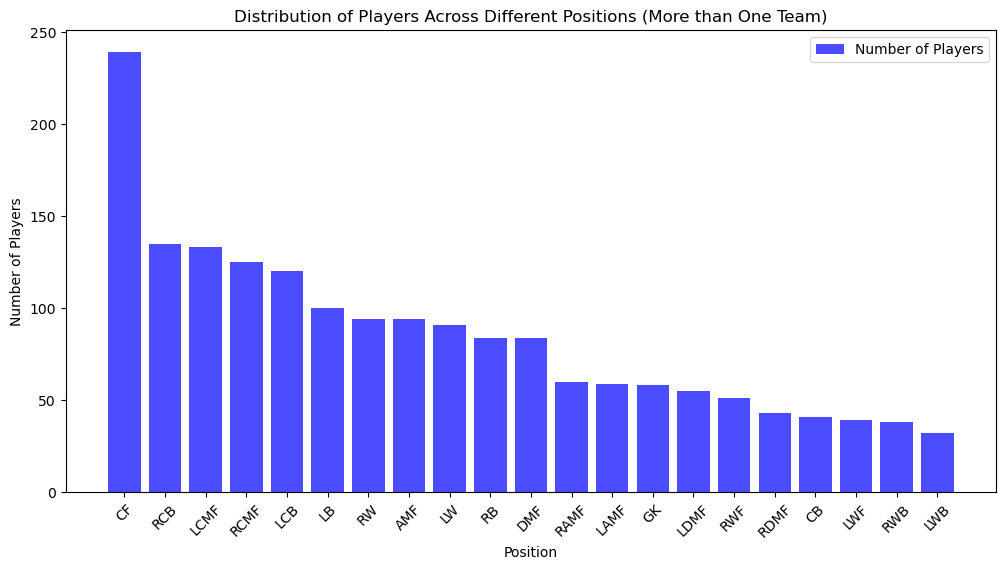

In [13]:

def plot_player_distribution_by_positions(dataframe):
    # filtering players who have been in more than one team
    filtered_dataframe = dataframe[dataframe.groupby('Player')['Team'].transform('nunique') > 1]

    position_counts = filtered_dataframe['Position'].str.split(', ').explode().value_counts()

    if 'No data' in position_counts:
        position_counts = position_counts.drop('No data')

    position_counts_df = pd.DataFrame({'Position': position_counts.index, 'Count': position_counts.values})
    position_counts_df = position_counts_df.sort_values(by='Count', ascending=False)

    plt.figure(figsize=(12, 6))
    plt.bar(position_counts_df['Position'], position_counts_df['Count'], color='blue', alpha=0.7, label='Number of Players')

    plt.xlabel('Position')
    plt.ylabel('Number of Players')
    plt.title('Distribution of Players Across Different Positions (More than One Team)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

plot_player_distribution_by_positions(nacdata)

Q5: Which country has the highest representation in the dataset in terms of player birthplace?

In [14]:

highest_birth_country = nacdata['Birth country'].value_counts().idxmax()
print(f"Country with the Highest Representation (Birthplace): {highest_birth_country}\n")

Country with the Highest Representation (Birthplace): Italy



Q6: Is there a correlation between a player's height and weight and the number of goals scored?

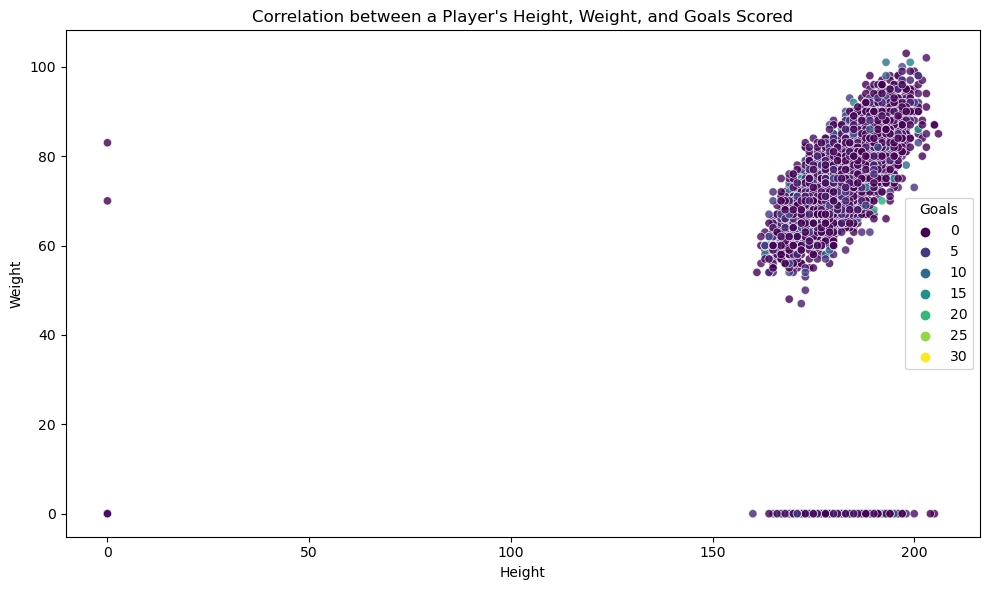

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_height_weight_goals_correlation(dataset):
    # Plotting the correlation between height, weight, and the number of goals scored
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Height', y='Weight', hue='Goals', data=dataset, palette='viridis', alpha=0.8)
    plt.title("Correlation between a Player's Height, Weight, and Goals Scored")
    plt.xlabel('Height')
    plt.ylabel('Weight')
    plt.legend(title='Goals')
    plt.tight_layout()
    plt.show()


plot_height_weight_goals_correlation(nacdata)

Q7: How does the number of goals per player vary accross different positions?

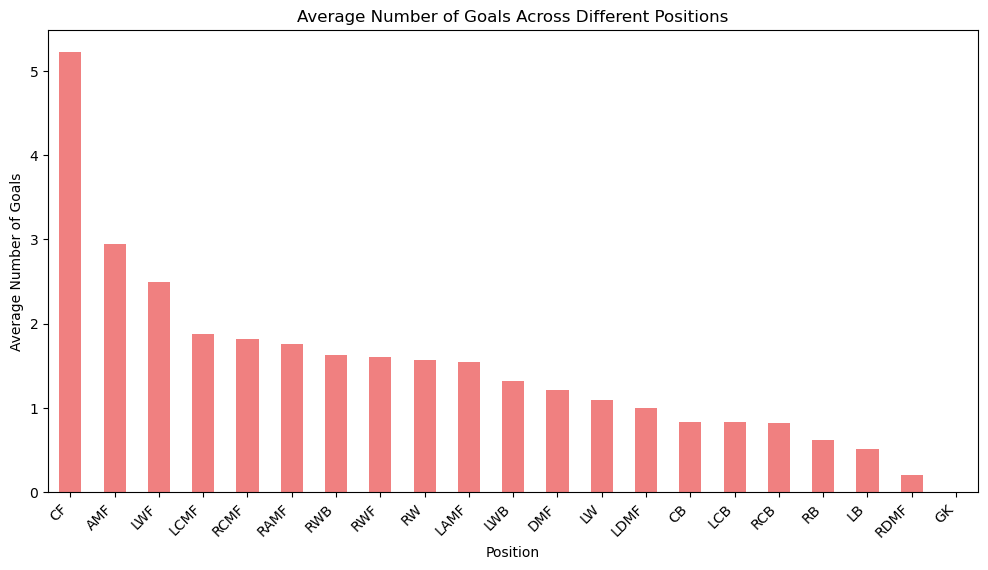

In [16]:
# again I clean the rows becuase for some reason there are still with missing position data
nacdata = nacdata.dropna(subset=['Position'])

# getting unique positions
unique_positions = nacdata['Position'].str.split(', ').explode().unique()

# calculating the average goals by position
average_goals_by_position = nacdata.groupby('Position')['Goals'].mean()

# filtering out 'No data' position
positions_to_plot = [pos for pos in unique_positions if pos != 'No data']

# the well known plotting 
plt.figure(figsize=(12, 6))
average_goals_by_position[positions_to_plot].sort_values(ascending=False).plot(kind='bar', color='lightcoral')
plt.title('Average Number of Goals Across Different Positions')
plt.xlabel('Position')
plt.ylabel('Average Number of Goals')
plt.xticks(rotation=45, ha='right')
plt.show()


Q8: What is the average number of matches played by players in different age groups?

Firstly, to answer this question we have to see what they ask us. The idea is to firstly divide the ages of the players into two categories, so respectivelly I chose 'young'and 'adult'. This is done by applying the 'lambda' function to each element in the 'Age' column. The lambda function checks if the age is less than 20. If it is, it assigns the value "young"; otherwise, it assigns the value "adult" and this is how I created the two age groups. 

In [17]:
nacdata['age_group'] = nacdata['Age'].apply(lambda x: "young" if x < 26 else "adult")

C:\Users\victo\AppData\Local\Temp\ipykernel_16140\2963686778.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nacdata['age_group'] = nacdata['Age'].apply(lambda x: "young" if x < 26 else "adult")


Now, after I have created the two age groups I just take the function "mean"and it gives me the average age of the two age groups I have created. 

In [18]:
age_groups = nacdata.groupby('age_group')['Matches played'].mean()
age_groups

age_group
adult    22.125278
young    19.890613
Name: Matches played, dtype: float64

Here we see that there is a significant difference between the played time of 'adult' players and 'young' players

In [19]:
age_groups = nacdata.groupby('age_group')['Minutes played'].mean()
age_groups

age_group
adult    1648.360278
young    1361.396487
Name: Minutes played, dtype: float64

Q9: Which players have the highest ‘xG (Expected Goals)' value and how does it compare with actual goals scored?

In [20]:
nacdata.groupby('Goals')['Player'].max().reset_index().sort_values(by='Goals', ascending=False).iloc[0]

Goals              30
Player    P. Iemmello
Name: 27, dtype: object

In [21]:
nacdata.groupby('xG')['Player'].max().reset_index().sort_values(by='xG', ascending=False).iloc[0]

xG               23.23
Player    M. Dugandžić
Name: 1208, dtype: object

Q10: What is the average contract duration left for players in each team?

In [22]:
nacdata['Contract expires'] = pd.to_datetime(nacdata['Contract expires'], errors='coerce') 
nacdata = nacdata.dropna(subset=['Contract expires'])  

contract_duration_left = (nacdata['Contract expires'] - pd.to_datetime('today')).dt.days
average_contract_duration_by_team = contract_duration_left.groupby(nacdata['Team']).mean().round().astype(int)

print(f"Average Contract Duration Left for Players in Each Team (in days):\n{average_contract_duration_by_team}\n")

Average Contract Duration Left for Players in Each Team (in days):
Team
1599 Şelimbăr        32
1860 München        165
ADO Den Haag        123
ADO Den Haag U21     32
AEK Athens          536
                   ... 
Šiauliai            -93
Šibenik             171
Žalgiris           -153
Žilina              239
Žilina II          -150
Name: Contract expires, Length: 1184, dtype: int32



C:\Users\victo\AppData\Local\Temp\ipykernel_16140\690085932.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  nacdata['Contract expires'] = pd.to_datetime(nacdata['Contract expires'], errors='coerce')
C:\Users\victo\AppData\Local\Temp\ipykernel_16140\690085932.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nacdata['Contract expires'] = pd.to_datetime(nacdata['Contract expires'], errors='coerce')


Q11: How do ‘Duels won %' and ‘Aerial duels won %' vary by position?

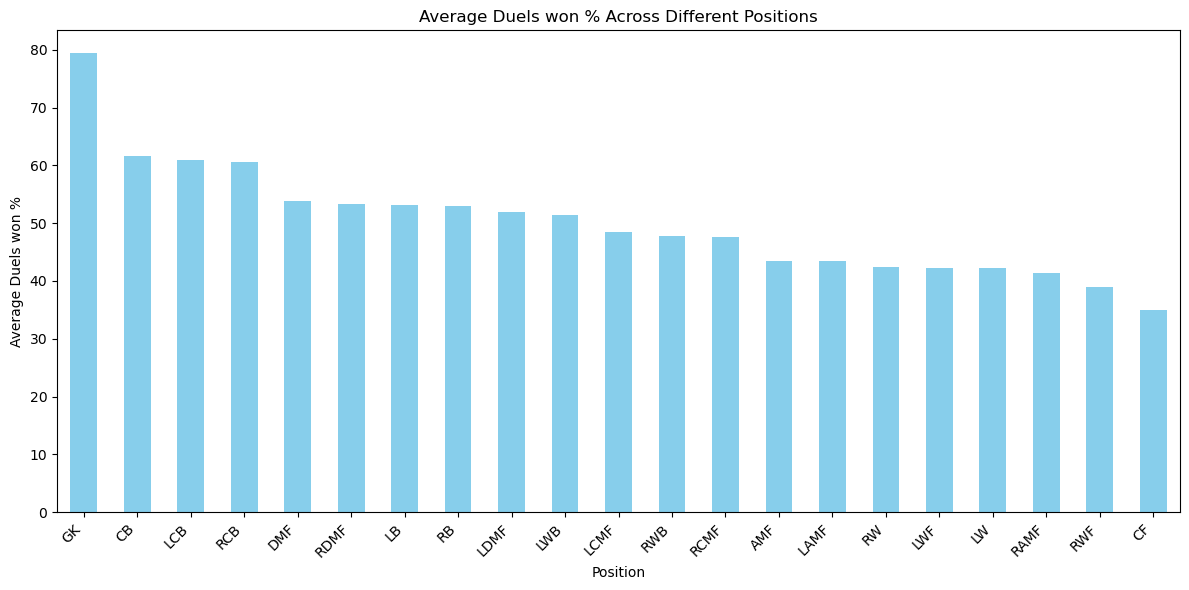

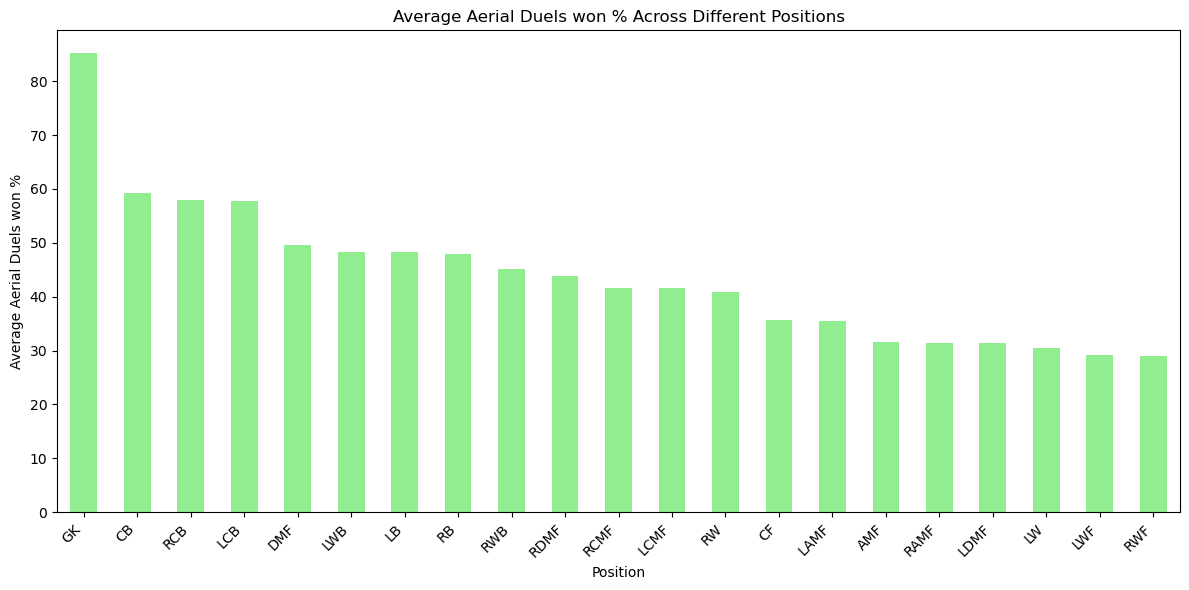

In [23]:
unique_positions = nacdata['Position'].str.split(', ').explode().unique()
duels_won_percentage_by_position = nacdata.groupby('Position')['Duels won, %'].mean()
aerial_duels_won_percentage_by_position = nacdata.groupby('Position')['Aerial duels won, %'].mean()

# Filtering out NaN values
positions_to_plot = [pos for pos in unique_positions if pd.notnull(pos) and pos != 'No data']

plt.figure(figsize=(12, 6))
duels_won_percentage_by_position[positions_to_plot].sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Average Duels won % Across Different Positions')
plt.xlabel('Position')
plt.ylabel('Average Duels won %')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
aerial_duels_won_percentage_by_position[positions_to_plot].sort_values(ascending=False).plot(kind='bar', color='lightgreen')
plt.title('Average Aerial Duels won % Across Different Positions')
plt.xlabel('Position')
plt.ylabel('Average Aerial Duels won %')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Q12: Is there a significant difference in ‘Successful defensive actions per 90' between players on loan and permanent players?

In [24]:
ddatata = nacdata.groupby('On loan')['Successful defensive actions per 90'].mean() #I name the data first, I group it by the columns in the datset 
diff = ddatata.iloc[0] - ddatata.iloc[-1]
if diff <= 1:
    print('no')
else: 
    print('yes')

no


Q13: Which players have the highest ‘Successful attacking actions per 90' and which position do they play?

In [25]:
# finding the players with the highest 'Successful attacking actions per 90' and their positions
max_successful_attacking_actions = nacdata['Successful attacking actions per 90']
players_highest_successful_attacking_actions = nacdata[nacdata['Successful attacking actions per 90'] == max_successful_attacking_actions]

# displaying the result
print("Players with the highest Successful attacking actions per 90 and their positions:")
for index, row in players_highest_successful_attacking_actions.iterrows():
    print(f"Player: {row['Player']}, Position: {row['Position']}")

Players with the highest Successful attacking actions per 90 and their positions:
Player: S. Baidoo, Position: RCB, LCB
Player: M. Seidl, Position: LWF, RWF, AMF
Player: B. Okoh, Position: LCB, RCB
Player: B. Koumetio, Position: LCB
Player: M. Polster, Position: LB, LAMF
Player: D. Oroz, Position: RCB
Player: O. Strunz, Position: RAMF, RWF, RW
Player: C. Lang, Position: CF, AMF
Player: N. Geyrhofer, Position: RCB
Player: S. Kapsamer, Position: LW, LB, LWB
Player: M. Oswald, Position: RDMF, RCMF
Player: M. Meisl, Position: LCB
Player: D. Carlson, Position: LB, LCB
Player: K. Stratznig, Position: RB, AMF
Player: T. Koch, Position: LCMF, RCMF
Player: N. Sattlberger, Position: DMF, LDMF, CB
Player: M. Baltaxa, Position: LB, LCB
Player: M. Pfeifer, Position: LB, LWB
Player: D. Kreiker, Position: LWB, LB
Player: L. Hartwig, Position: CF
Player: M. Tóth, Position: CF, RWF
Player: B. Vyunnyk, Position: CF
Player: M. Maranda, Position: RCB
Player: M. Rasner, Position: RCMF
Player: N. Binder, Po

Q14: What is the relationship between ‘Goals per 90' and ‘Assists per 90' for forwards?

In [26]:
forwards_data = nacdata[nacdata['Position'].str.contains('F')]
correlation_value = forwards_data['Goals per 90'].corr(forwards_data['Assists per 90'])

print(f"Relationship between Goals per 90 and Assists per 90 for Forwards: {correlation_value:.2f}")

Relationship between Goals per 90 and Assists per 90 for Forwards: 0.16


Correlation of 0.14 suggests weak relationship between these two variables. 

Q15: Which players exceed in ‘Shots on target %' and how does it relate to their overall ‘Goal conversion %'?

In [27]:
# finding players who exceed in 'Shots on target %'
exceeding_shots_on_target = nacdata[nacdata['Shots on target, %'] > nacdata['Shots on target, %'].mean()]

# displaying of the players and their 'Shots on target %' and 'Goal conversion %'
print("Players who exceed in Shots on target % and their Goal conversion %:")
for index, row in exceeding_shots_on_target.iterrows():
    print(f"Player: {row['Player']}, Shots on target %: {row['Shots on target, %']}, Goal conversion, %: {row['Goal conversion, %']}")


Players who exceed in Shots on target % and their Goal conversion %:
Player: M. Seidl, Shots on target %: 31.52, Goal conversion, %: 13.043
Player: B. Okoh, Shots on target %: 33.33, Goal conversion, %: 0.0
Player: B. Koumetio, Shots on target %: 33.33, Goal conversion, %: 0.0
Player: M. Polster, Shots on target %: 40.0, Goal conversion, %: 20.0
Player: O. Strunz, Shots on target %: 41.67, Goal conversion, %: 16.667
Player: C. Lang, Shots on target %: 43.24, Goal conversion, %: 13.514
Player: N. Geyrhofer, Shots on target %: 33.33, Goal conversion, %: 0.0
Player: T. Koch, Shots on target %: 34.21, Goal conversion, %: 10.526
Player: N. Sattlberger, Shots on target %: 33.33, Goal conversion, %: 0.0
Player: D. Kreiker, Shots on target %: 41.18, Goal conversion, %: 17.647
Player: L. Hartwig, Shots on target %: 56.41, Goal conversion, %: 30.769
Player: M. Tóth, Shots on target %: 50.98, Goal conversion, %: 25.49
Player: M. Maranda, Shots on target %: 31.58, Goal conversion, %: 15.789
Player

Now, keeping in mind the result from above I will group the maximum 'Shots on target, %' with the 'Goal conversion, %'. In that way I will display in a table only the top players from category 'Shots on target. %' respectivelly with their 'Goal conversion, %'. 

FIrstly, this code helped to show who are the players who exceed in the category 'Shots on target%', however this was not enough to indicate how this result relate to their overalll 'Goal conversion%'. 
Indeed, we are able to see that when the 'Shots on target, %' has a high result the corresponding result for 'Goal conversion, %' is not even close to this number. For instance, let's take number 730 (player L.Antal), we seee that the result for 'Shots on target. %' is 87.50, but the corresponding result for 'Goal conversion, %' is 37.50. The same goes for the rest of the players list. We can conclude that there is indeed some relatioship between these two variables, however not really strong. Below in the vizualization section I will show this relationship through a scatterplot better. 

Q16: How do ‘Passes per 90' and ‘Accurate passes %' correlate for midfielders?

In [28]:
midfielders_data = nacdata[nacdata['Position'].str.contains('MF')]
passes_accuracy_correlation = midfielders_data[['Passes per 90', 'Accurate passes, %']].corr()

correlation_coefficient = passes_accuracy_correlation.iloc[0, 1]

print(f"Correlation between Passes per 90 and Accurate passes % for Midfielders: {correlation_coefficient:.2f}")

Correlation between Passes per 90 and Accurate passes % for Midfielders: 0.66


Again here the correlation coefficient it around 0.5 which does not indicate a strong relationship, but there is some between the two variables indeed.

Q17: Is there a trend in the ‘Save rate %' for goalkeepers across different age groups?

In [29]:
def save_rate_trend_by_age_group(dataset, age_groups):
    #Calculating the average save rate for each age group
    avg_save_rate_by_age_group = dataset.groupby('age_group')['Save rate, %'].mean()

    # Printing then the average save rate for each age group
    print("Average Save Rate % for Goalkeepers Across Different Age Groups:")
    for age_group, avg_save_rate in avg_save_rate_by_age_group.items():
        print(f"{age_group.capitalize()}: {avg_save_rate:.2f}")

    # Comparing the average save rates between age groups
    if avg_save_rate_by_age_group['adult'] > avg_save_rate_by_age_group['young']:
        trend = "higher"
    elif avg_save_rate_by_age_group['adult'] < avg_save_rate_by_age_group['young']:
        trend = "lower"
    else:
        trend = "similar"

    # Printinh the trend
    print(f"\nThe trend in Save rate % for goalkeepers across different age groups is that the save rate for adults is {trend} than for young goalkeepers.")


save_rate_trend_by_age_group(nacdata, {'adult': 22.125278, 'young': 19.890613})

Average Save Rate % for Goalkeepers Across Different Age Groups:
Adult: 6.25
Young: 4.65

The trend in Save rate % for goalkeepers across different age groups is that the save rate for adults is higher than for young goalkeepers.


Q18: What is the distribution of ‘Yellow cards per 90' and ‘Red cards per 90' across different positions?

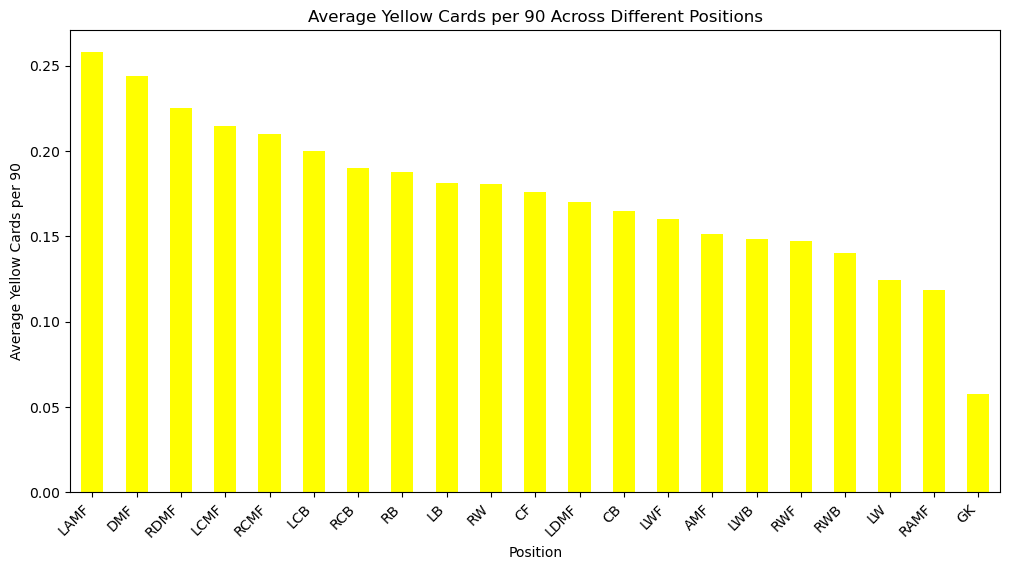

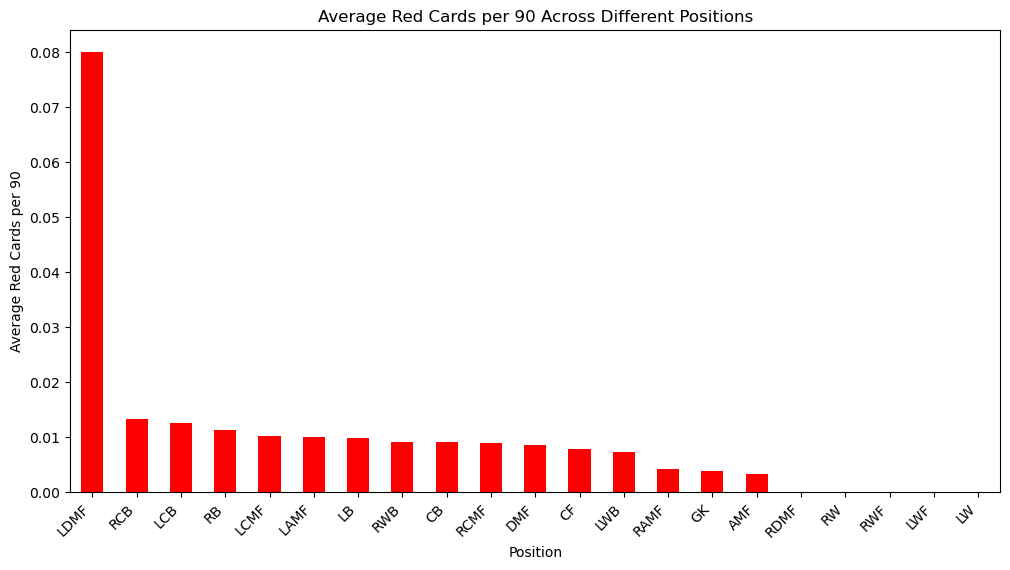

In [30]:
unique_positions = nacdata['Position'].str.split(', ').explode().unique()
yellow_cards_per_90_by_position = nacdata.groupby('Position')['Yellow cards per 90'].mean()
red_cards_per_90_by_position = nacdata.groupby('Position')['Red cards per 90'].mean()

positions_to_plot = [pos for pos in unique_positions if pos != 'No data']

plt.figure(figsize=(12, 6))
yellow_cards_per_90_by_position[positions_to_plot].sort_values(ascending=False).plot(kind='bar', color='yellow')
plt.title('Average Yellow Cards per 90 Across Different Positions')
plt.xlabel('Position')
plt.ylabel('Average Yellow Cards per 90')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize=(12, 6))
red_cards_per_90_by_position[positions_to_plot].sort_values(ascending=False).plot(kind='bar', color='red')
plt.title('Average Red Cards per 90 Across Different Positions')
plt.xlabel('Position')
plt.ylabel('Average Red Cards per 90')
plt.xticks(rotation=45, ha='right')
plt.show()


Q19: How does ‘Fouls suffered per 90' compare for attackers and defenders?

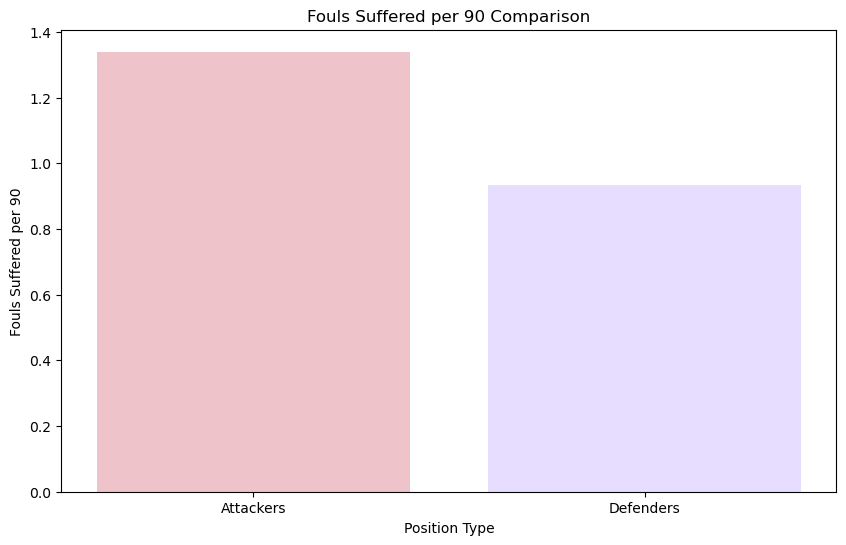

In [31]:
attackers_data = nacdata[nacdata['Position'].isin(['CF', 'LWF', 'RWF', 'ST', 'RW', 'LW']) | nacdata['Position'].str.contains('FW') | nacdata['Position'].str.contains('F')]

defenders_data = nacdata[nacdata['Position'].isin(['CB', 'LB', 'RB', 'LWB', 'RWB']) | nacdata['Position'].str.contains('DF')]

attackers_fouls_per_90 = attackers_data['Fouls suffered per 90'].mean()
defenders_fouls_per_90 = defenders_data['Fouls suffered per 90'].mean()

plt.figure(figsize=(10, 6))
plt.bar(['Attackers', 'Defenders'], [attackers_fouls_per_90, defenders_fouls_per_90], color=['#EFC3CA', '#E7DDFF'])
plt.title('Fouls Suffered per 90 Comparison')
plt.xlabel('Position Type')
plt.ylabel('Fouls Suffered per 90')
plt.show()

Q20: Which players have the highest ‘Penalty conversion, %' and what are their overall shooting statistics?

In [32]:
highest_penalty_conversion_players = nacdata.nlargest(10, 'Penalty conversion, %')[['Player', 'Penalty conversion, %', 'Goals per 90', 'Shots per 90', 'Shots on target, %', 'Goal conversion, %']]

print("Players with the Highest Penalty conversion % and Their Shooting Statistics:")
print(highest_penalty_conversion_players.to_string(index=False))

Players with the Highest Penalty conversion % and Their Shooting Statistics:
       Player  Penalty conversion, %  Goals per 90  Shots per 90  Shots on target, %  Goal conversion, %
J. Keiblinger                  100.0          0.16          0.82               36.00              20.000
  P. Fallmann                  100.0          0.05          0.44               44.44              11.111
     M. Şatin                  100.0          0.25          2.47               36.67              10.000
  A. Neumayer                  100.0          0.04          0.53               40.00               6.667
   E. Tepecik                  100.0          0.34          2.61               21.74              13.043
    Ronivaldo                  100.0          0.81          5.01               44.44              16.239
   O. Diakité                  100.0          0.43          2.33               51.02              18.367
     B. Šeško                  100.0          0.66          3.19               53.2

### Visualizations

Include all the visualizations you made in this section. This is related to the excellent criteria of ILO 4.2. Use the blocks below to enter the code for graphs you created with matplotlib (or seaborn, bokeh, or another visualization package). 

❗ If you would like to showcast your visualizations using streamlit, you need to hand in a seperate .py file for this. It is not possible to run streamlit code from a python notebook. Please note down below if you do so.

1. Scatter plot of Age vs Market Value:

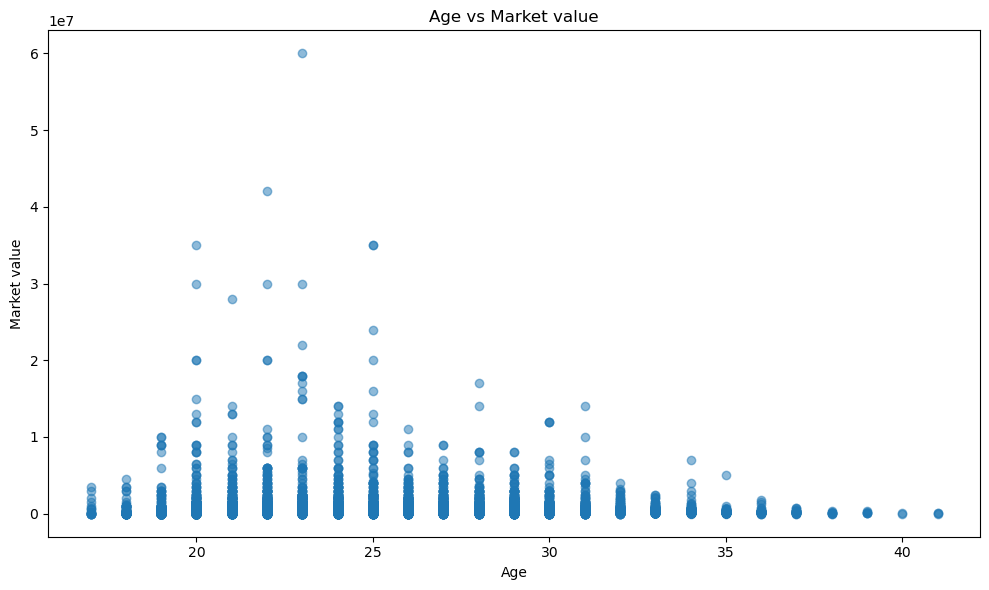

Correlation coefficient between Age and Market value: -0.04975092277642911


In [33]:
import matplotlib.pyplot as plt

def plot_age_market_value_scatter(dataset):
    plt.figure(figsize=(10, 6))
    plt.scatter(dataset['Age'], dataset['Market value'], alpha=0.5)
    plt.title('Age vs Market value')
    plt.xlabel('Age')
    plt.ylabel('Market value')
    plt.tight_layout()
    plt.show()

    correlation = dataset['Age'].corr(dataset['Market value'])
    print(f"Correlation coefficient between Age and Market value: {correlation}")

plot_age_market_value_scatter(nacdata)

2. Market value vs Positions

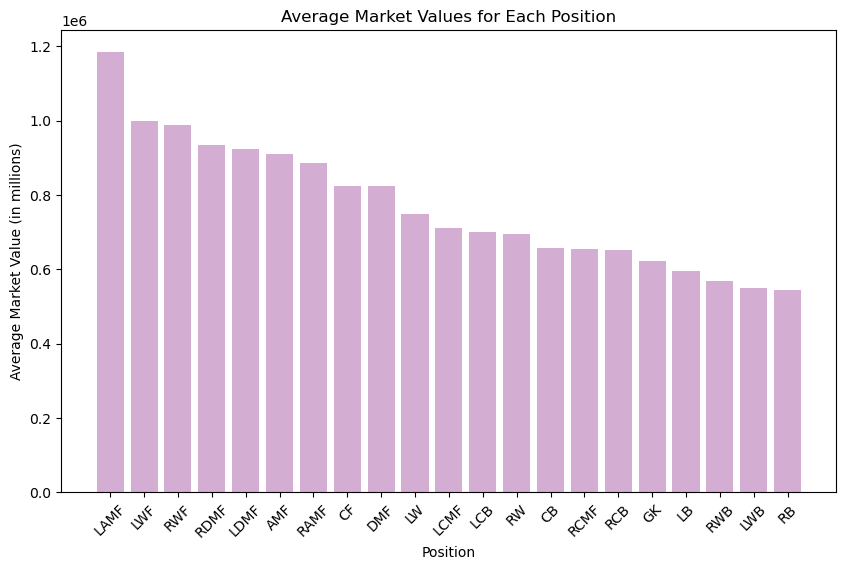

In [34]:
def plot_average_market_values_for_positions(dataframe):
    if 'Position' in dataframe.columns and 'Market value' in dataframe.columns:
    
        unique_positions = dataframe['Position'].str.split(', ').explode().unique()

        avg_market_values_df = pd.DataFrame(index=unique_positions, columns=['Average Market Value'])

        for position in unique_positions:
            if 'No data' not in position:
                position_data = dataframe[dataframe['Position'].str.contains(position, na=False)]
                avg_market_value = position_data['Market value'].mean()
                avg_market_values_df.loc[position, 'Average Market Value'] = avg_market_value

        avg_market_values_df = avg_market_values_df.dropna()

        avg_market_values_df = avg_market_values_df.sort_values(by='Average Market Value', ascending=False)

        plt.figure(figsize=(10, 6)) 
        plt.bar(avg_market_values_df.index, avg_market_values_df['Average Market Value'], alpha=0.7, color='#C28BBF')

        plt.xlabel('Position')
        plt.ylabel('Average Market Value (in millions)')
        plt.title('Average Market Values for Each Position')
        plt.xticks(rotation=45)
        plt.show()


plot_average_market_values_for_positions(nacdata)


3. Top 15 Average Market Values by Age 

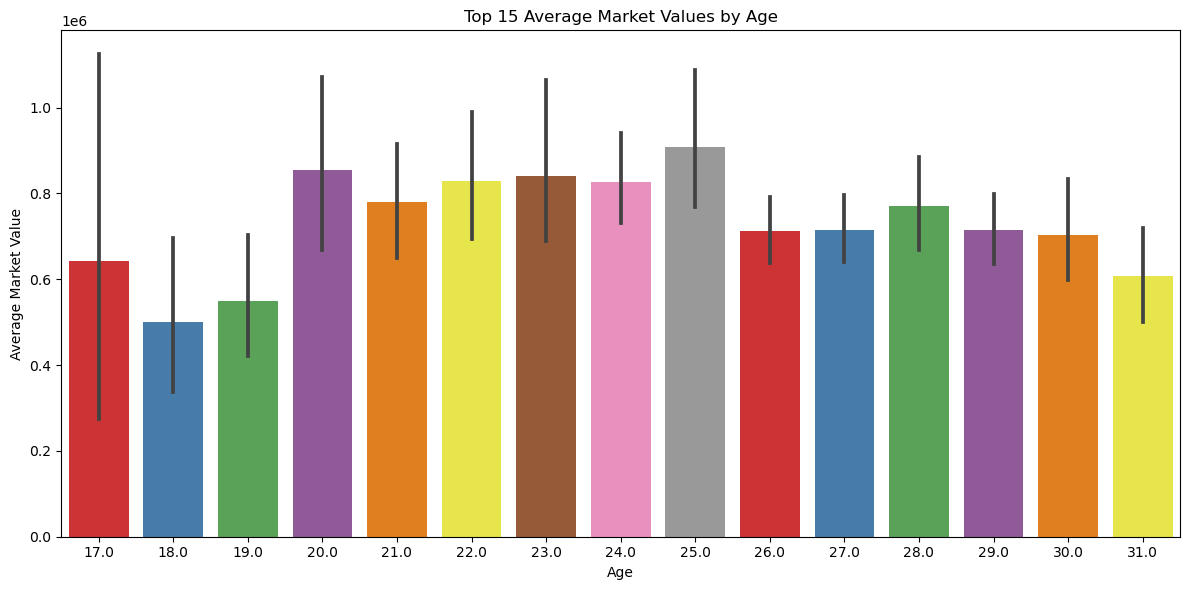

In [35]:
def plot_top_avg_market_value_by_age(dataset, top_n=15):
    # calculating the average market value for each age group
    avg_market_value_by_age = dataset.groupby('Age')['Market value'].mean().sort_values(ascending=False)

    # top age groups with the highest average market value
    top_age_groups = avg_market_value_by_age.head(top_n).index.tolist()

    #filtering the dataset to include only the players in the top age groups
    top_age_groups_data = dataset[dataset['Age'].isin(top_age_groups)]

    #plotting
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Age', y='Market value', data=top_age_groups_data, estimator=np.mean, palette='Set1')
    plt.title(f'Top {top_n} Average Market Values by Age')
    plt.xlabel('Age')
    plt.ylabel('Average Market Value')
    plt.tight_layout()
    plt.show()

plot_top_avg_market_value_by_age(nacdata, top_n=15)


4. Average Aerial Duels WOn, % by Age 

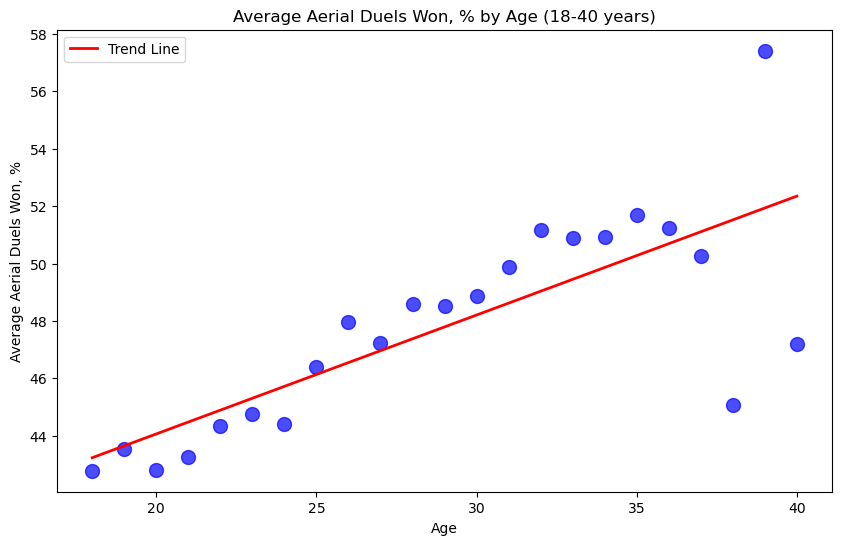

In [36]:
df_cleaned = nacdata.dropna(subset=['Age', 'Aerial duels won, %'])

age_range = (18, 40)  # Define the age range

df_filtered = df_cleaned[(df_cleaned['Age'] >= age_range[0]) & (df_cleaned['Age'] <= age_range[1])]

grouped_data = df_filtered.groupby('Age')['Aerial duels won, %'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.scatter(grouped_data['Age'], grouped_data['Aerial duels won, %'], alpha=0.7, s=100, color='blue')

plt.xlabel('Age')
plt.ylabel('Average Aerial Duels Won, %')
plt.title('Average Aerial Duels Won, % by Age (18-40 years)')

x = grouped_data['Age'].values.reshape(-1, 1)
y = grouped_data['Aerial duels won, %'].values.reshape(-1, 1)
model = LinearRegression().fit(x, y)
trend_line = model.predict(x)
plt.plot(grouped_data['Age'], trend_line, color='red', linewidth=2, label='Trend Line')

plt.legend()

plt.show()


5. Total Penalties Taken by Age(Top 25 cases)

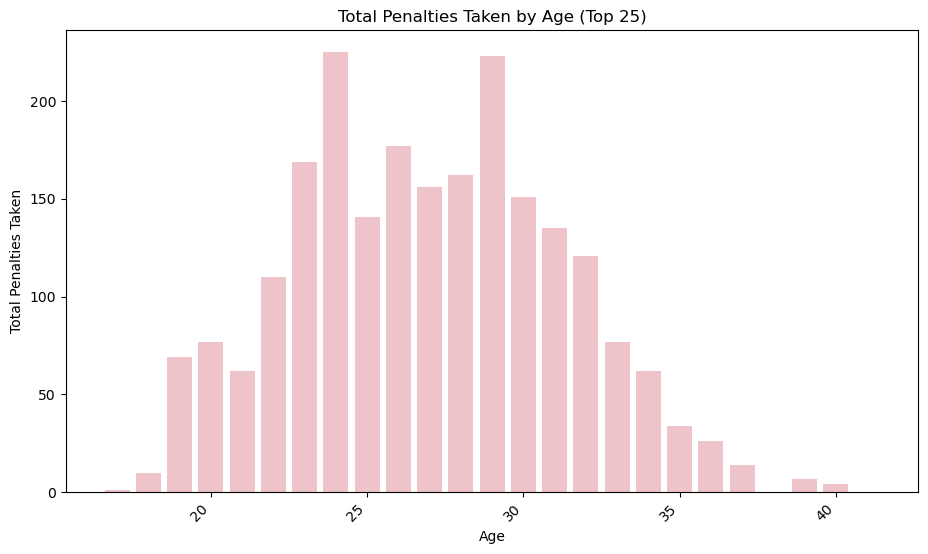

In [37]:
df_cleaned = nacdata.dropna(subset=['Penalties taken', 'Age'])

penalties_by_age = df_cleaned.groupby('Age')['Penalties taken'].sum().reset_index()

penalties_by_age = penalties_by_age.sort_values(by='Penalties taken', ascending=False).head(25)

plt.figure(figsize=(11, 6))
plt.bar(penalties_by_age['Age'], penalties_by_age['Penalties taken'], color='#EFC3CA')

plt.xlabel('Age')
plt.ylabel('Total Penalties Taken')
plt.title('Total Penalties Taken by Age (Top 25)')

plt.xticks(rotation=45, ha='right')

plt.show()

### Database and ETL

Include all the python code and explanations on your RESTful API and database operations in this section. This is related to the excellent criteria of ILO 4.1.

❗ These code you cannot showcast using the NAC data. Use the data provided for the homework and datalab preperation of these modules.

This is from "Week3DataLabPrep_233182_API"

### 2.2 Learn and write API connection in Python

### OAuth: A Practical Example

In [38]:
import requests

# My personal Client ID and Client Secret
CLIENT_ID = "82493cb80944f4cb9da6"
CLIENT_SECRET = "554822953c1cd7b2824e3462c15539e1cfb605c3"

# The following variable is replaced with what I added in above
# the "Authorization callback URL" field
REDIRECT_URI = "https://httpbin.org/anything"

def create_oauth_link():
    params = {
        "client_id": CLIENT_ID,
        "redirect_uri": REDIRECT_URI,
        "scope": "repo",  # Requesting repo scope to access private repositories
        "response_type": "code",
    }
    endpoint = "https://github.com/login/oauth/authorize"
    response = requests.get(endpoint, params=params)
    response.raise_for_status()  # Raise an exception if request fails
    return response.url

def exchange_code_for_access_token(code=None):
    params = {
        "client_id": CLIENT_ID,
        "client_secret": CLIENT_SECRET,
        "redirect_uri": REDIRECT_URI,
        "code": code,
    }
    headers = {"Accept": "application/json"}
    endpoint = "https://github.com/login/oauth/access_token"
    response = requests.post(endpoint, params=params, headers=headers)
    response.raise_for_status()  # Raise an exception if request fails
    data = response.json()
    if 'error' in data:
        raise ValueError(f"Error exchanging code for access token: {data['error_description']}")
    return data["access_token"]

def print_user_info(access_token=None):
    headers = {"Authorization": f"token {access_token}"}
    endpoint = "https://api.github.com/user"
    response = requests.get(endpoint, headers=headers)
    response.raise_for_status()  # Raise an exception if request fails
    data = response.json()
    name = data.get("name", "N/A")
    username = data.get("login", "N/A")
    private_repos_count = data.get("total_private_repos", "N/A")
    print(
        f"{name} ({username}) | private repositories: {private_repos_count}"
    )

try:
    link = create_oauth_link()
    print(f"Follow the link to start the authentication with GitHub: {link}")
    code = input("GitHub code: ")
    access_token = exchange_code_for_access_token(code)
    print(f"Exchanged code {code} with access token: {access_token}")
    print_user_info(access_token=access_token)
except Exception as e:
    print(f"An error occurred: {e}")

Follow the link to start the authentication with GitHub: https://github.com/login?client_id=82493cb80944f4cb9da6&return_to=%2Flogin%2Foauth%2Fauthorize%3Fclient_id%3D82493cb80944f4cb9da6%26redirect_uri%3Dhttps%253A%252F%252Fhttpbin.org%252Fanything%26response_type%3Dcode%26scope%3Drepo
An error occurred: Error exchanging code for access token: The code passed is incorrect or expired.


GIPHY

This is the GIPHY request, following the link you will see the GIPHY I chose 

In [39]:
import requests

# This is the API key which I got
API_KEY = "VHloBf4KVwVKS9ujBV0RrO1Y7fDJznis"
endpoint = "https://api.giphy.com/v1/gifs/search"

search_term = "Alice In Wonderland Thank You GIF"
params = {"api_key": API_KEY, "limit": 1, "q": search_term, "rating": "g"}
response = requests.get(endpoint, params=params).json()
for gif in response["data"]:
    title = gif["title"]
    url = gif["url"]
    print(f"{title} | {url}")


Alice In Wonderland Thank You GIF | https://giphy.com/gifs/alice-in-wonderland-thank-you-xIJLgO6rizUJi


## Machine Learning

### Identifying basic Machine Learning applications.
In the following subsection, show your understanding of each of the listed Machine Learning algorithms. Excecute these algorithms on the NAC dataset. This is related to the poor (and insufficient) criteria of ILO 5.0. 

❗Remember! All your package imports should be on top of this notebook.

I will put the code for splitting the positions of the players again so it is visible in this section too and also the age groups varible, so I do not need to go back 

In [40]:
nacdata['Minutes played']

0        1986
1        2293
2         476
3         389
4         464
         ... 
16491     876
16502     811
16516     388
16526     593
16531     969
Name: Minutes played, Length: 9444, dtype: int64

In [41]:
age_group_mapping = {'young': 0, 'adult': 1}

nacdata['age_group_encoded'] = nacdata['age_group'].map(age_group_mapping)

In [42]:
y = nacdata['age_group_encoded']
X = nacdata[['Market value', 'Minutes played', 'Smart passes per 90', 'Accurate smart passes, %', 'Key passes per 90', 'Passes to final third per 90','Accurate passes to final third, %']]

In [43]:
nacdata_explode = nacdata[["Position", "Save rate, %", "Age"]]['Position'].str.split(', ').explode("Position")
nacdata_explode

0         RCB
1         LCB
2         LWF
3         RWF
4         AMF
         ... 
18632    LCMF
18633     RCB
18634     LCB
18635      LB
18636     LCB
Name: Position, Length: 18637, dtype: object

### Simple machine learning modelling pipeline

### Simple Linear regression

AGE VS MINUTES PLAYED

Load and read the file with NAC DATA again because for it is just easier to come here and look at it again if at some point I get an error. 

Here for the Simple Linear Regression I will use the "Age" variable because I have to choose a cnotinous vaairble not the categorized version of "Age", meaning the "age_group_encoded"

In [44]:
nacdata['age_group'] = nacdata['Age'].apply(lambda x: "young" if x < 20 else "adult")

In [45]:
nacdata['Age']

0        19.0
1        22.0
2        20.0
3        20.0
4        20.0
         ... 
16491    24.0
16502    22.0
16516    25.0
16526    20.0
16531    30.0
Name: Age, Length: 9444, dtype: float64

Here  I create a new reshaped verison of X for the linear regression, it takes the column named 'Minutes played' from the DataFrame X, extracts its values, and reshapes them into a 2D array with one column. 

In [46]:
X_lr = X['Minutes played'].values.reshape(-1, 1)

Defining train and test sets: 

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_lr, y, test_size=0.2, random_state=42)

Training and initializing the linear regression model: 

In [48]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

Now, finally, using this trained model I will make predictions using the trained linear regression model and respctfully evaluating its performance in the end: 

In [49]:
y_pred_train = model_lr.predict(X_train)
y_pred_test = model_lr.predict(X_test)

# Evaluating the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print()
print(f'Training MSE: {train_mse}')
print(f'Test MSE: {test_mse}')
print(f'Training R^2: {train_r2}')
print(f'Test R^2: {test_r2}')


Training MSE: 0.24288466022312336
Test MSE: 0.24225980459425064
Training R^2: 0.01685124169016572
Test R^2: 0.02472895576438916


In general the model performs poorly due to the fact that the chosen column 'Minutes played' is not enough for predicting such a classifying problem.  
I will now explain some of the metrics: 

1. Mean Squared Error: 
values are relatively low, which indicates that the model's predictions are close to the actual values on average. However, the problem is that MSE alone doesn't provide a full picture of model performance and this is why I will give further explanation on one more metric.

2. Additionally R-squared values are very low (close to 0), showing that the model explains only about 2.6% of the variance in the training data and 3.2% of the variance in the test data. All in all this suggests that the model does not make relationship between the "Market value" and the "age_group_encoded" very well.

### Multiple linear regression

'Age' VS 'Market value', 'Minutes played', 'Smart passes per 90', 'Accurate smart passes, %', 'Key passes per 90', 'Passes to final third per 90','Accurate passes to final third, %'

Defining the values x and y

In [50]:
X.columns

Index(['Market value', 'Minutes played', 'Smart passes per 90',
       'Accurate smart passes, %', 'Key passes per 90',
       'Passes to final third per 90', 'Accurate passes to final third, %'],
      dtype='object')

In [51]:
y = nacdata['Age']
X = nacdata[['Market value', 'Minutes played', 'Smart passes per 90', 'Accurate smart passes, %', 'Key passes per 90', 'Passes to final third per 90','Accurate passes to final third, %']]

Preparing a subset of features from the dataframe: 

In [52]:
X_lr_m = X[['Market value', 'Minutes played', 'Smart passes per 90', 'Accurate smart passes, %', 'Key passes per 90', 'Passes to final third per 90','Accurate passes to final third, %']]
#X_lr_m = X_lr_m.dropna()
X_lr_m = X_lr_m.values.reshape(-1, 1)

In [53]:
# Defining the target variable and feature matrix
y = nacdata['Age']
X = nacdata[['Market value', 'Minutes played', 'Smart passes per 90', 'Accurate smart passes, %', 'Key passes per 90', 'Passes to final third per 90', 'Accurate passes to final third, %']]

# I had an error, so I will drop now all rows with missing values in the features or target
data = pd.concat([X, y], axis=1).dropna()
X = data[X.columns]
y = data['Age']

#here I am spliiting  the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#initialization of the Linear Regression model
model = LinearRegression()

#training the model
model.fit(X_train, y_train)

# predictions
y_pred = model.predict(X_test)

#and lastly, this is the evaluation of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 17.21236538905159
R-squared: 0.04649443289047317


Looking at the results, they indicate that the model still does not perform well with linear regression. This is not something bad, but actually show us exactly the prolem we ar etrying to solve, which does not include regression or linear relationship but multiple reltaionships between different categroies in this case 'young' and 'adult' players. So, the conclusion after performing both simple and multiple linear regression is that I have to search for classifying type of model. 

Interpretetaion of the metrics: 
The Mean Squared Error (MSE) of 20 and R-squared (R²) value of 0.045 are showing that the model's performance is not very strong. The MSE value represents the average squared difference between the predicted and actual values, and a lower value is better. 

#### Logistic regression

Here for the logistic regression I will use "age_group_encoded" variable, where I categorized "Age" variable in two bins "young players" ( <26 years) and "adult players"(> 26 years). Also I encoded it, repetfully "young players" are 0 and "adult players" are 1. 

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

#defining the target variable and feature matrix
y = nacdata['age_group_encoded'] #those are the two bins I created for the "Age" variable
X = nacdata[['Market value', 'Minutes played', 'Smart passes per 90', 'Accurate smart passes, %', 'Key passes per 90', 'Passes to final third per 90', 'Accurate passes to final third, %']]

#dopping rows with missing values in the features or target
X = X.dropna()
y = y[X.index]

# here respectfully I will split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#standardizing the features with the StadardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Initialization of the Logistic Regression model itself
model = LogisticRegression()

#training the model
model.fit(X_train_scaled, y_train)

# Making predictions
y_pred = model.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6026525198938992
Precision: 0.5998884637879159
Recall: 0.6026525198938992
F1 Score: 0.583774712085497
Confusion Matrix:
 [[820 219]
 [530 316]]
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.79      0.69      1039
           1       0.59      0.37      0.46       846

    accuracy                           0.60      1885
   macro avg       0.60      0.58      0.57      1885
weighted avg       0.60      0.60      0.58      1885



#### Tree-based model

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

#defining the target variable and feature matrix
y = nacdata['age_group_encoded']#those are the two bins I created for the "Age" variable
X = nacdata[['Market value', 'Minutes played', 'Smart passes per 90', 'Accurate smart passes, %', 'Key passes per 90', 'Passes to final third per 90', 'Accurate passes to final third, %']]


#dopping rows with missing values in the features or target
X = X.dropna()
y = y[X.index]

# here respectfully I will split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#standardizing the features with the StadardScaler, it is optional for the tre-based models but I will do it 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initializing the Random Forest model, a classifier to be more specific becuase I use the categorized version of "Age" variable "age_group_encoded"
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model
model.fit(X_train_scaled, y_train)

# predictions
y_pred = model.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5840848806366048
Precision: 0.5790134408315742
Recall: 0.5840848806366048
F1 Score: 0.5776104083233373
Confusion Matrix:
 [[724 315]
 [469 377]]
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.70      0.65      1039
           1       0.54      0.45      0.49       846

    accuracy                           0.58      1885
   macro avg       0.58      0.57      0.57      1885
weighted avg       0.58      0.58      0.58      1885



Interpretation of the results: 

- Accuracy is 0.61, which is relativelly good
- Precision is 0.60 which shows that 60% of the instances the model predicted as positive were actually positive.
- Recall is 0.61 this means the model correctly identified 61% of all actual positive instances.
- F1 Score: 0.61 is the mean of precision and recall, providing a single metric that balances both.
  
- Confusion Matrix piece by piece: 
True Negatives 1267 (model correctly predicted 0)
False Positives 592 (model incorrectly predicted 1)
False Negatives 687 (model incorrectly predicted 0)
True Positives 715 (model correctly predicted 1)

Results for the clasees: 

For class 0:
Precision, 65% of predicted 0s are correct
Recall, 68% of actual 0s are correctly predicted

For class 1:
Precision, 55% of predicted 1s are correct
Recall, 51% of actual 1s are correctly predicted

#### Gradient Boosted Trees 

Gradient Boosting

I am going to use the Gradient boosting now becuase it will enhance my model's  performance by sequentially adding weak learners to correct the errors of the ensemble, optimizing the model through gradient descent. 

In [56]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

#defining the target variable and feature matrix
y = nacdata['age_group_encoded']#those are the two bins I created for the "Age" variable
X = nacdata[['Market value', 'Minutes played', 'Smart passes per 90', 'Accurate smart passes, %', 'Key passes per 90', 'Passes to final third per 90', 'Accurate passes to final third, %']]

#dopping rows with missing values in the features or target
X = X.dropna()
y = y[X.index]

# here respectfully I will split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#standardizing the features with the StadardScaler, it is optional for the tre-based models but I will do it 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initializing the Gradient Boosting model, a classifier to be more specific becuase I use the categorized version of "Age" variable "age_group_encoded"
model = GradientBoostingClassifier(n_estimators=100, random_state=42)

#training the model
model.fit(X_train_scaled, y_train)

#making predictions
y_pred = model.predict(X_test_scaled)

#evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6047745358090185
Precision: 0.6005128461329602
Recall: 0.6047745358090185
F1 Score: 0.594836332261625
Confusion Matrix:
 [[772 267]
 [478 368]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.74      0.67      1039
           1       0.58      0.43      0.50       846

    accuracy                           0.60      1885
   macro avg       0.60      0.59      0.59      1885
weighted avg       0.60      0.60      0.59      1885



Interpretation of the results: 

- Accuracy is 0.62, which is relativelly good
- Precision is 0.62 which shows that 62% of the instances the model predicted as positive were actually positive.
- Recall is 0.62 this means the model correctly identified 61% of all actual positive instances.
- F1 Score: 0.62 is the mean of precision and recall, providing a single metric that balances both.
  
- Confusion Matrix piece by piece: 
The model correctly predicted 1216 instances as negative (0("young players")), but incorrectly classified 643 negative instances as positive (1"adult players").
It correctly predicted 814 instances as positive (1"adult players"), but misclassified 588 positive instances as negative (0("young players")).

The reson for the results from the confusion matrix might be outliers in the data which led the model to misclassify some "young players" as "adult players."

#### Unsupervised learning with K-Means

c:\Users\victo\OneDrive\Documents\Python Scripts\envs\block_b\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\victo\AppData\Local\Temp\ipykernel_16140\3593553506.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nacdata_cleaned['Cluster'] = kmeans.labels_


Cluster Centers:
 [[1.09436436e+06 1.45921043e+03 5.90275263e-01 4.25111988e+01
  5.50912713e-01 3.29681999e+00 6.58326331e+01]
 [7.52885417e+05 1.98133299e+03 2.66527778e-01 5.04191632e+01
  2.14239583e-01 6.43301736e+00 6.82276771e+01]
 [4.72093362e+05 1.41356546e+03 9.65644010e-02 4.25258397e+00
  1.31364718e-01 3.44172177e+00 5.88849511e+01]]


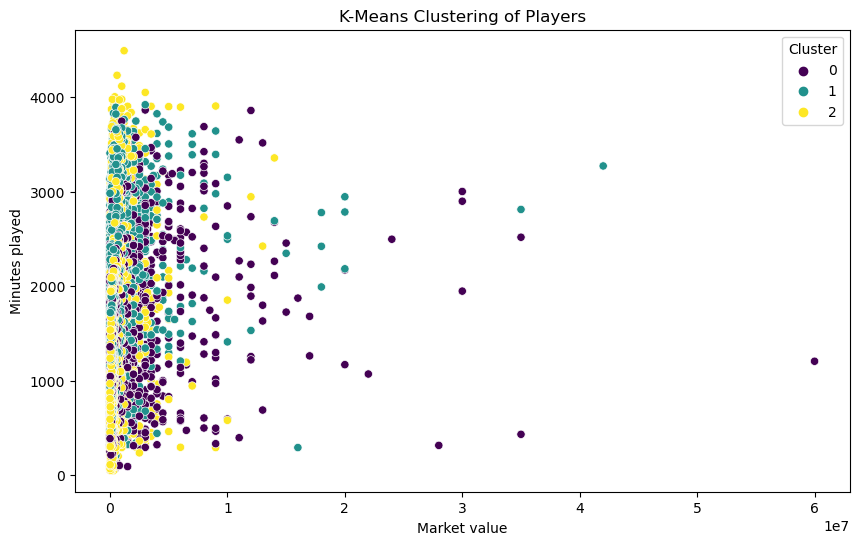

In [57]:
from sklearn.cluster import KMeans

#defining the feature matrix(all the variables I used for simple, mulituple linear regression and logistic regression)
X = nacdata[['Market value', 'Minutes played', 'Smart passes per 90', 'Accurate smart passes, %', 'Key passes per 90', 'Passes to final third per 90', 'Accurate passes to final third, %']]

#one more time i will drop the rows with missing values in the feature, so I can be sure no errors will appear 
nacdata_cleaned = nacdata.dropna(subset=['Market value', 'Minutes played', 'Smart passes per 90', 'Accurate smart passes, %', 'Key passes per 90', 'Passes to final third per 90', 'Accurate passes to final third, %'])
X = nacdata_cleaned[['Market value', 'Minutes played', 'Smart passes per 90', 'Accurate smart passes, %', 'Key passes per 90', 'Passes to final third per 90', 'Accurate passes to final third, %']]

#standardizing the features using Standardscaler 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#applying the K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  #three types of clusters 
kmeans.fit(X_scaled)

#adding the cluster labels to the cleaned data
nacdata_cleaned['Cluster'] = kmeans.labels_

# cluster centers
print("Cluster Centers:\n", scaler.inverse_transform(kmeans.cluster_centers_))

#evaluation and visualizion the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Market value', y='Minutes played', hue='Cluster', data=nacdata_cleaned, palette='viridis')
plt.title('K-Means Clustering of Players')
plt.show()


### Interpretation of the results: 


## Cluster 0 Interpretation:

Market Value: 774,155.23
Minutes Played: 1,385.75
Smart Passes per 90: 0.586
Accurate Smart Passes, %: 43.34%
Key Passes per 90: 0.530
Passes to Final Third per 90: 3.318
Accurate Passes to Final Third, %: 65.17%


Role and Performance:
These players are likely to be mid-level midfielders or playmakers who contribute consistently to the team's overall play.
They have moderate market value and playing time. Their passing metrics indicate they are competent in making smart and key passes with reasonable accuracy. They play a balanced role, contributing to both maintaining possession and creating opportunities without being the primary playmakers or top performers in these areas.

### Cluster 1 Interpretation:
Market Value: 562,895.96
Minutes Played: 1,971.73
Smart Passes per 90: 0.255
Accurate Smart Passes, %: 47.96%
Key Passes per 90: 0.199
Passes to Final Third per 90: 6.315
Accurate Passes to Final Third, %: 67.26%

Role and Performance:
These players are likely to be defensive midfielders or box-to-box midfielders who focus on transitioning the ball from defense to attack.
Despite having a lower market value, they have high playing time, indicating their importance to the team. Their strength lies in making passes to the final third with good accuracy, although they perform fewer smart and key passes. These players are crucial in maintaining the flow of the game and moving the ball up the pitch, but they are not primarily responsible for creating scoring opportunities.


### Cluster 2 Interpretation:
Market Value: 309,330.85
Minutes Played: 1,239.86
Smart Passes per 90: 0.094
Accurate Smart Passes, %: 38.03%
Key Passes per 90: 0.126
Passes to Final Third per 90: 3.359
Accurate Passes to Final Third, %: 57.86%


Role and Performance:
These players are likely to be defensive players, young talents, or substitutes who do not play as much and are less involved in offensive play.
They have the lowest market value and playing time, suggesting they are either less experienced, younger players, or primarily defensive players whose role is to prevent the opposition from advancing rather than creating offensive opportunities. Their passing metrics are the lowest, indicating a minimal contribution to advanced passing plays. These players might be focusing on defensive duties or are still developing their skills.


Summary of Player Roles in each cluster:
Cluster 0: Balanced players, likely midfielders or playmakers, who contribute to both defense and offense with moderate proficiency.

Cluster 1: Defensive or box-to-box midfielders, focusing on transitioning play and maintaining possession rather than creating direct scoring chances.

Cluster 2: Defensive players, young talents, or substitutes with limited playing time and offensive contributions, focusing more on defensive duties or development.

#### Correlation Analysis and Feature Selection


Grouping the ages in two age groups as follows: young players are below 26 and adult are above. 

Correlation Matrix:
                                    Market value  Minutes played  \
Market value                           1.000000        0.122777   
Minutes played                         0.122777        1.000000   
Smart passes per 90                    0.134298       -0.036727   
Accurate smart passes, %               0.067258        0.083304   
Key passes per 90                      0.139328       -0.052484   
Passes to final third per 90           0.027239        0.141297   
Accurate passes to final third, %      0.092753        0.004881   
age_group_encoded                     -0.047344        0.136530   

                                   Smart passes per 90  \
Market value                                  0.134298   
Minutes played                               -0.036727   
Smart passes per 90                           1.000000   
Accurate smart passes, %                      0.273234   
Key passes per 90                             0.492438   
Passes to final third per 9

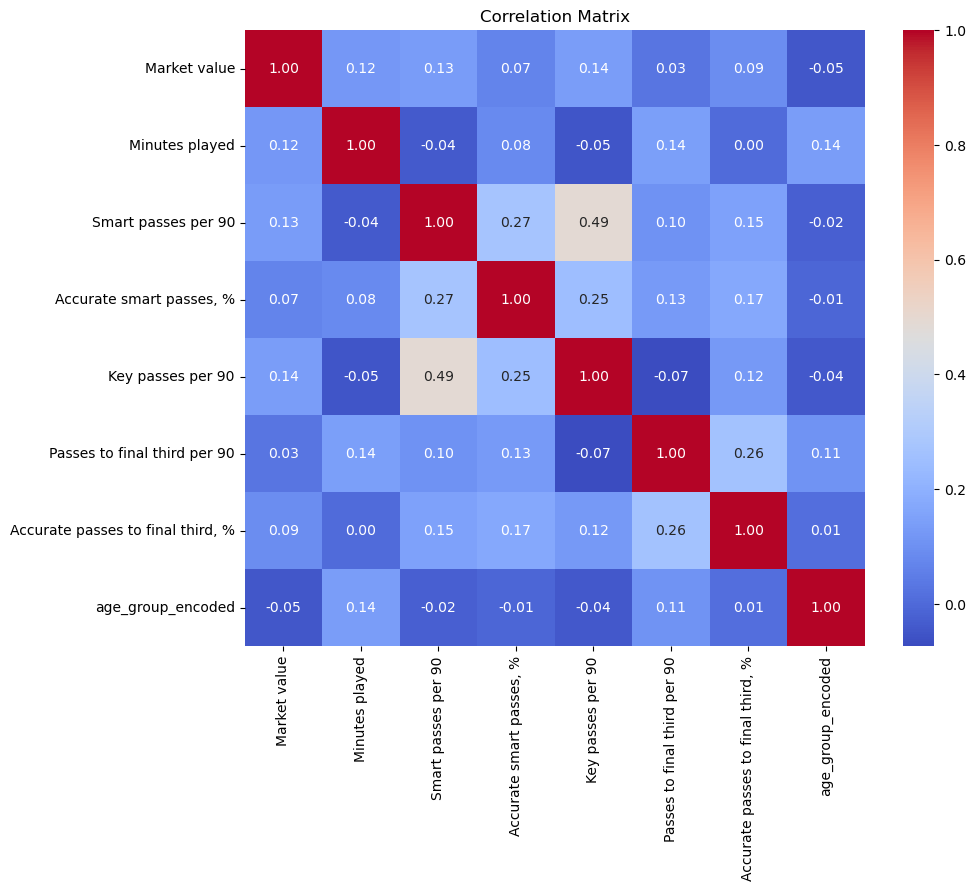


Correlation of features with the target variable:
 Market value                        -0.047344
Minutes played                       0.136530
Smart passes per 90                 -0.024185
Accurate smart passes, %            -0.007141
Key passes per 90                   -0.042275
Passes to final third per 90         0.107811
Accurate passes to final third, %    0.012366
Name: age_group_encoded, dtype: float64

Selected Features based on correlation threshold:
 []


In [58]:
#firstly, I will again define the target variable and the feature matrix
y = nacdata['age_group_encoded']
X = nacdata[['Market value', 'Minutes played', 'Smart passes per 90', 'Accurate smart passes, %', 'Key passes per 90', 'Passes to final third per 90', 'Accurate passes to final third, %']]

#joining the target variable to the feature matrix for correlation calculation
data_for_corr = pd.concat([X, y], axis=1)

#correlation matrix calculation
corr_matrix = data_for_corr.corr()

# correlation matrix
print("Correlation Matrix:\n", corr_matrix)

# plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#exactracting the correlation of features with the target variable
corr_with_target = corr_matrix['age_group_encoded'].drop('age_group_encoded')
print("\nCorrelation of features with the target variable:\n", corr_with_target)

# this is the feature selection based on correlation threshold 
selected_features = corr_with_target[abs(corr_with_target) > 0.2].index.tolist()
print("\nSelected Features based on correlation threshold:\n", selected_features)

### Interpretation of the results: 


Market Value and Performance Metrics:
Market value has weak correlations with performance metrics, suggesting it may be influenced by other factors like experience, reputation, and market dynamics rather than in-game performance alone.

Minutes Played:
This metric has a weak positive correlation with age group, indicating older players might play more, which could reflect their experience and fitness levels allowing them more game time.

Smart and Key Passes: 
These metrics are moderately correlated with each other, indicating players good at making smart passes also tend to make more key passes, highlighting a skill overlap.

Passes to Final Third: 
Both the number and accuracy of these passes show weak correlations with minutes played, suggesting players who are more involved in the game tend to make more forward passes and with better accuracy.

Age Group Encoded: 
The weak correlations across the board suggest age group encoded (younger vs. older players) does not have strong linear relationships with the given performance metrics. This indicates that performance metrics alone may not be good predictors of player age category, and other factors may need to be considered.

### Evaluating the performance of the model

In the following subsection include your Python code on how you evaluated your chosen model(s). This is related to the sufficient criteria of ILO 5.0. 

Evaluating through indicating the accuracy: 

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


#defining the target variable and feature matrix
y = nacdata['age_group_encoded']
X = nacdata[['Market value', 'Minutes played', 'Smart passes per 90', 'Accurate smart passes, %', 'Key passes per 90', 'Passes to final third per 90', 'Accurate passes to final third, %']]

#dropping the rows with missing values in the features or target
X = X.dropna()
y = y[X.index]

#splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features, which is  optional but recommended for tree-based models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# initializing the Gradient Boosting classifier model which ensures data integrity, standardizes features, and assesses model performance using accuracy
model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# training the model
model.fit(X_train_scaled, y_train)

# making predictions
y_pred = model.predict(X_test_scaled)

#evaluation of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6047745358090185


It will be a good way of evaluating because it will provide a detailed analysis of true positives, true negatives, false positives, and false negatives. Additionally, it will indicate in that way insights into how the model performs across different classes. 

Evaluating by importing confusion matrix: 

In [60]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[772 267]
 [478 368]]


In [61]:
# evaluation of classification models to identify the set of unique classes for comparison, which are mentioned and showed above multiple times
from sklearn.utils.multiclass import unique_labels
unique_labels(y_test, y_pred)

array([0, 1], dtype=int64)

Here this function helps us to combine the confusion matrix with the lables, so the visualization is more clear 

In [62]:
# combining the lables with th econfusin matrix 

def plot(y_true, y_pred):
    labels = unique_labels(y_test, y_pred)
    column = [f'Predicted {label}' for label in labels]
    indices = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), columns=column, index=indices)

    return table

plot(y_test, y_pred)

,Predicted 0,Predicted 1
Actual 0,772,267
Actual 1,478,368


Now next will be displayed the same table but visualized through a matrix which will make easier to understand the model better, especially the correlations in between the data 

<Axes: >

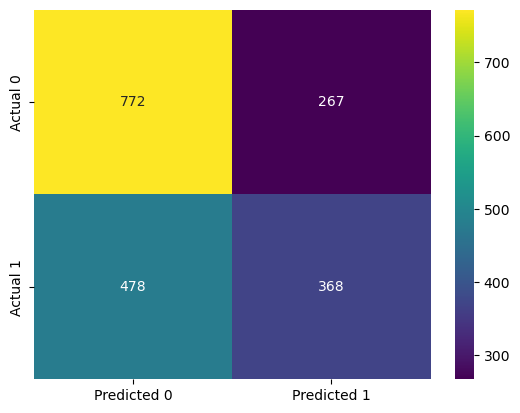

In [63]:
# combining the lables with th econfusin matrix 

def plot(y_true, y_pred):
    labels = unique_labels(y_test, y_pred)
    column = [f'Predicted {label}' for label in labels]
    indices = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), columns=column, index=indices)
    
    return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

plot(y_test, y_pred)

Evaluating  with Precision, Recall and F1-score 

Firstly, we import the the ML model classification_report from sklearn. Then we can see for each label precision, recall and f1-score. The support column indicates how much data do we have for each of the labels( in this case only 2) and in total the data is 114. 

In [64]:
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [65]:
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.6005128461329602
Recall: 0.6047745358090185
F1 Score: 0.594836332261625


In [66]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.74      0.67      1039
           1       0.58      0.43      0.50       846

    accuracy                           0.60      1885
   macro avg       0.60      0.59      0.59      1885
weighted avg       0.60      0.60      0.59      1885



#### Interpretation of precisions, recall and F1-score: 

### Precision
'young'  players (0): Out of all instances predicted as 'young', 67% were actually 'young'.

'adult' players (1): Out of all instances predicted as 'adult', 56% were actually 'adult'.

### Recall
'young'  players (0): The model correctly identified 65% of the actual 'young' instances.

'adult' players (1):  The model correctly identified 58% of the actual 'adult' instances.

### F1-Score
This metric is the one that indicates the balance between precision and recall.

### Interpretation
The model performs slightly better in predicting age group 'young' (represented by 0) compared to age group 'adult' (represented by 1), as indicated by higher precision, recall, and F1-score for age group 'young'.
When considering the implications of false positives and false negatives, it ha s to be kept in mind the context of age groups. For example, if misclassifying 'adults' as 'young' has significant consequences, which has becuase here in this research I am trying to prove that the 'young' players are underestimated.

### Improving the performance of the model

In the following subsection include your Python code on how you improved your chosen model(s). This is related to the good criteria of ILO 5.0.  

Improving the performance of the model using Feature engineering: 

In [69]:
from sklearn.model_selection import GridSearchCV

# Splitting the training data into training and validation sets
X_train_final, X_val, y_train_final, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

# Defining the hyperparameters grid to search
param_dist = {
    'n_estimators': [100, 150],
    'learning_rate': [0.1, 0.2, 0.5],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.6, 0.8, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initializing the Gradient Boosting model
model = GradientBoostingClassifier(random_state=42)

# Initializing GridSearchCV to serach one by one the best hyperparameter combination 
grid_search = GridSearchCV(model, param_dist, cv=3, scoring='accuracy')

#performance of the Grid Search
grid_search.fit(X_train_final, y_train_final)

#best model
best_model = grid_search.best_estimator_

# Evaluation of the best model on the validation set
val_accuracy = accuracy_score(y_val, best_model.predict(X_val))
print("Validation Accuracy:", val_accuracy)

#evaluting the best model on the test set
test_accuracy = accuracy_score(y_test, best_model.predict(X_test_scaled))
print("Test Accuracy:", test_accuracy)


Validation Accuracy: 0.5663129973474801
Test Accuracy: 0.6079575596816976


✍️ I improved my model by using the following tehcniques: 

1. Grid Search: I use this technique to systematically go through multiple combinations of hyperparameters, see each combination, and select the best one based on a specified performance metric (accuracy in this case)

2. Cross-Validation: I use it becuase it ensures that the model's performance is not just due to a particular train-test split and provides a more reliable estimate of the model's generalization capability

3. Hyperparameter Tuning: By tuning the hyperparameters, the model can potentially achieve better performance compared to using default values

### Choose the best model

In the following subsection reflect on the most appropriate machine learning model. This is related to the excellent criteria of ILO 5.0.  

In [68]:
# defining the target variable and feature matrix
y = nacdata['age_group_encoded']
X = nacdata[['Market value', 'Minutes played', 'Smart passes per 90', 'Accurate smart passes, %', 'Key passes per 90', 'Passes to final third per 90', 'Accurate passes to final third, %']]

#dropping rows with missing values in the features or target
X = X.dropna()
y = y[X.index]

#splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# standardization of the features (it is recommended for tree-based models this is why I used it)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#initializing the Gradient Boosting model
model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# training the model
model.fit(X_train_scaled, y_train)

# predictions
y_pred = model.predict(X_test_scaled)

#evaluation of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6047745358090185


✍️ The Gradient Boosted Tree model is the one I chose because it gave best score with the features I needed to predict and use for predictions. The total accuracy score is around 61%. I tried the Tre-based Model with RandomForestClassifier which had an accuracy of 58%. The problem is that it randomly chooses combinations and from these random combinations chooses the best. However, even though this one was way faster to execute I chose the GradientBoostingClassifier becuase the accuracy is improved with 2-3% by using it instead of RandomForestClassifier. The reason why it took more time is that the GridSearch goeas through every single combination of hyperparameters and chooses the best one. It takes a lot of time but it is better, around 61% accuracy. 

### Linear Algebra and Calculus

In the following subsection, provide the related evidences for ILO7.0.

### Assignment for "Elementary Operation on Matrices"

This task is associated with the 'Poor' criterion of ILO 7.0. You can find the assignment [here](https://adsai.buas.nl/Study%20Content/Advanced%20Python/AssignElemOpe.html).   

Please provide the related link to the PDF file for Task 1 of assignment on elementary operations on matrices. 

In [ ]:
# Provide the link to the assignment on elementary operations on matrices here
# here is the permalink to my pdf file: https://github.com/BredaUniversityADSAI/2023-24b-fai1-adsai-VictoriaVicheva233182/blob/77dc66b909045fabd6eeda72e732ce1925cef6fb/Deliverables/EleOpeMat_233182.pdf

Please provide your code for Task 2 of assignment on elementary operations on matrices.

# Using Python and Numpy to check my answers to Task 1.
- Computing the transpose of A and B

In [ ]:
import numpy as np

A = np.array([[3, -5], [-2, 7]])
B = np.array([[2, -3, 4], [-5, 6, 7], [-8, 9, 1]])

A_transpose = np.transpose(A)
B_transpose = np.transpose(B)

print("Matrix A Transpose:")
print(A_transpose)

print("\nMatrix B Transpose:")
print(B_transpose)

Matrix A Transpose:
[[ 3 -2]
 [-5  7]]

Matrix B Transpose:
[[ 2 -5 -8]
 [-3  6  9]
 [ 4  7  1]]


- Now I am computing the the element-wise product of two different matrices.

In [ ]:

A = np.array([[3, 2, -1], [-2, 7, 4], [1, 6, 8]])
B = np.array([[2, -3, -4], [-5, -6, 7], [-8, 9, 1]])

E_W_product = np.multiply(A, B)

print("Element-wise product of matrices A and B:")
print(E_W_product)


Element-wise product of matrices A and B:
[[  6  -6   4]
 [ 10 -42  28]
 [ -8  54   8]]


- Below I am computing the matrix product of the same matrices.

In [ ]:
A = np.array([[3, 2, -1], [-2, 7, 4], [1, 6, 8]])
B = np.array([[2, -3, -4], [-5, -6, 7], [-8, 9, 1]])

matrix_product = np.dot(A, B)

print("Matrix product of matrices A and B:")
print(matrix_product)

Matrix product of matrices A and B:
[[  4 -30   1]
 [-71   0  61]
 [-92  33  46]]


- Changing the order of the matrices and computing the element-wise and matrix products again.

In [ ]:

A = np.array([[3, 2, -1], [-2, 7, 4], [1, 6, 8]])
B = np.array([[2, -3, -4], [-5, -6, 7], [-8, 9, 1]])

elementwise_product = np.multiply(B, A)

print("Element-wise product of matrices B and A:")
print(elementwise_product)

matrix_product = np.dot(B, A)

print("\nMatrix product of matrices B and A:")
print(matrix_product)

Element-wise product of matrices B and A:
[[  6  -6   4]
 [ 10 -42  28]
 [ -8  54   8]]

Matrix product of matrices B and A:
[[  8 -41 -46]
 [  4 -10  37]
 [-41  53  52]]


- Computing the the determinant of three new matrices A, B and C

In [ ]:
A = np.array([[3, 2, -1], [-2, 7, 4], [1, 6, 8]])
B = np.array([[3, -2, 1], [2, 7, 6], [-1, 4, 8]])
C = np.array([[1, 3, 5], [2, 6, 7], [4, 12, 8]])

det_A = np.linalg.det(A)
det_B = np.linalg.det(B)
det_C = np.linalg.det(C)

print("Determinant of matrix A: %.2f" % det_A)
print("Determinant of matrix B: %.2f" % det_B)
print("Determinant of matrix C: %.2f" % det_C)

Determinant of matrix A: 155.00
Determinant of matrix B: 155.00
Determinant of matrix C: 0.00


- Computing the inverse of two new matrices A and B


In [ ]:
A = np.array([[3, 2], [-2, 7]])
B = np.array([[4, 0], [0, 5]])

inv_A = np.linalg.inv(A)
inv_B = np.linalg.inv(B)

print("Inverse of matrix A:")
print(inv_A)

print("\nInverse of matrix B:")
print(inv_B)

Inverse of matrix A:
[[ 0.28 -0.08]
 [ 0.08  0.12]]

Inverse of matrix B:
[[0.25 0.  ]
 [0.   0.2 ]]


- Verify that A^{-1}B^{-1}= (BA)^{-1}


In [ ]:
inv_A = np.linalg.inv(A)
inv_B = np.linalg.inv(B)

left_s = np.dot(inv_A, inv_B)
right_s = np.linalg.inv(np.dot(B, A))

result = np.allclose(left_s, right_s)


print("Inverse of matrix A:")
print(inv_A)

print("\nInverse of matrix B:")
print(inv_B)

print("\nVerification result:", result)

Inverse of matrix A:
[[ 0.28 -0.08]
 [ 0.08  0.12]]

Inverse of matrix B:
[[0.25 0.  ]
 [0.   0.2 ]]

Verification result: True


# Task 2 - Use Python and Numpy to verify the following properties
- Verifying (A^T)^T = A

In [ ]:
A = np.array([[3, 2, -1], [-2, 7, 4], [1, 6, 8]])

# calculating (A^T)^T
result = np.transpose(np.transpose(A))

# check if the result is equal to matrix A
verification_result = np.array_equal(result, A)

print("Matrix A:")
print(A)

print("\n(A^T)^T:")
print(result)

print("\nVerification result:", verification_result)

Matrix A:
[[ 3  2 -1]
 [-2  7  4]
 [ 1  6  8]]

(A^T)^T:
[[ 3  2 -1]
 [-2  7  4]
 [ 1  6  8]]

Verification result: True


- Verifying  A + B = B + A

In [ ]:
A = np.array([[3, 2, -1], [-2, 7, 4], [1, 6, 8]])
B = np.array([[-1, 2, 3], [5, -4, 9], [-7, 8, 6]])

# calculating A + B and B + A
sum_AB = A + B
sum_BA = B + A

# checking if the two results are equal
verification_result = np.array_equal(sum_AB, sum_BA)

print("\nA + B:")
print(sum_AB)

print("\nB + A:")
print(sum_BA)

print("\nVerification result:", verification_result)


A + B:
[[ 2  4  2]
 [ 3  3 13]
 [-6 14 14]]

B + A:
[[ 2  4  2]
 [ 3  3 13]
 [-6 14 14]]

Verification result: True


- Verifying  A + (B + C) = (A + B) + C

In [ ]:
A = np.array([[3, 2, -1], [-2, 7, 4], [1, 6, 8]])
B = np.array([[-1, 2, 3], [5, -4, 9], [-7, 8, 6]])
C = np.array([[-5, 4, 9], [6, 1, 3], [7, 2, -8]])

# calculate A + (B + C) and (A + B) + C
sum_A_B_C = A + (B + C)
sum_A_B_plus_C = (A + B) + C

# check if the two results are equal
verification_result = np.array_equal(sum_A_B_C, sum_A_B_plus_C)

print("\nA + (B + C):")
print(sum_A_B_C)

print("\n(A + B) + C:")
print(sum_A_B_plus_C)

print("\nVerification result:", verification_result)


A + (B + C):
[[-3  8 11]
 [ 9  4 16]
 [ 1 16  6]]

(A + B) + C:
[[-3  8 11]
 [ 9  4 16]
 [ 1 16  6]]

Verification result: True


- Verifing (A + B)^T= A^T + B^T

In [ ]:
A = np.array([[3, 2, -1], [-2, 7, 4], [1, 6, 8]])
B = np.array([[-1, 2, 3], [5, -4, 9], [-7, 8, 6]])

# calculating (A + B)^T, A^T, and B^T
sum_AB_transpose = np.transpose(A + B)
A_transpose = np.transpose(A)
B_transpose = np.transpose(B)

# calculating A^T + B^T
sum_A_B_transpose = A_transpose + B_transpose

# checking if the two results are equal
verification_result = np.array_equal(sum_AB_transpose, sum_A_B_transpose)

print("\n(A + B)^T:")
print(sum_AB_transpose)

print("\nA^T + B^T:")
print(sum_A_B_transpose)

print("\nVerification result:", verification_result)


(A + B)^T:
[[ 2  3 -6]
 [ 4  3 14]
 [ 2 13 14]]

A^T + B^T:
[[ 2  3 -6]
 [ 4  3 14]
 [ 2 13 14]]

Verification result: True


- Verifying AB != BA

In [ ]:
A = np.array([[3, 2, -1], [-2, 7, 4], [1, 6, 8]])
B = np.array([[-1, 2, 3], [5, -4, 9], [-7, 8, 6]])

# calculating AB and BA
p_AB = np.dot(A, B)
p_BA = np.dot(B, A)

# checking if AB is not equal to BA
verification_result = not np.array_equal(p_AB, p_BA)

print("\nAB:")
print(p_AB)

print("\nBA:")
print(p_BA)

print("\nVerification result:", verification_result)


AB:
[[ 14 -10  21]
 [  9   0  81]
 [-27  42 105]]

BA:
[[ -4  30  33]
 [ 32  36  51]
 [-31  78  87]]

Verification result: True


- Verifying  A(BC) = (AB)C

In [ ]:
A = np.array([[3, 2, -1], [-2, 7, 4], [1, 6, 8]])
B = np.array([[-1, 2, 3], [5, -4, 9], [-7, 8, 6]])
C = np.array([[-5, 4, 9], [6, 1, 3], [7, 2, -8]])

# calculating A(BC) and (AB)C
product_A_BC = np.dot(A, np.dot(B, C))
product_AB_C = np.dot(np.dot(A, B), C)

# checking if A(BC) is equal to (AB)C
verification_result = np.array_equal(product_A_BC, product_AB_C)

print("\nA(BC):")
print(product_A_BC)

print("\n(AB)C:")
print(product_AB_C)

print("\nVerification result:", verification_result)


A(BC):
[[  17   88  -72]
 [ 522  198 -567]
 [1122  144 -957]]

(AB)C:
[[  17   88  -72]
 [ 522  198 -567]
 [1122  144 -957]]

Verification result: True


- Verifying A(B + C) = AB + AC

In [ ]:
A = np.array([[3, 2, -1], [-2, 7, 4], [1, 6, 8]])
B = np.array([[-1, 2, 3], [5, -4, 9], [-7, 8, 6]])
C = np.array([[-5, 4, 9], [6, 1, 3], [7, 2, -8]])

# calculating A(B + C) and AB + AC
product_A_B_plus_C = np.dot(A, B + C)
product_AB_plus_AC = np.dot(A, B) + np.dot(A, C)

# checking if A(B + C) is equal to AB + AC
verification_result = np.array_equal(product_A_B_plus_C, product_AB_plus_AC)

print("\nA(B + C):")
print(product_A_B_plus_C)

print("\nAB + AC:")
print(product_AB_plus_AC)

print("\nVerification result:", verification_result)



A(B + C):
[[ 4  2 62]
 [89  7 52]
 [60 68 68]]

AB + AC:
[[ 4  2 62]
 [89  7 52]
 [60 68 68]]

Verification result: True


- Verifying (AB)^T = B^T * A^T

In [ ]:
A = np.array([[3, 2, -1], [-2, 7, 4], [1, 6, 8]])
B = np.array([[-1, 2, 3], [5, -4, 9], [-7, 8, 6]])

# calculating (AB)^T, B^T, and A^T
product_AB_transpose = np.transpose(np.dot(A, B))
B_transpose = np.transpose(B)
A_transpose = np.transpose(A)

# calculating B^T A^\T
product_B_A_transpose = np.dot(B_transpose, A_transpose)

# checking if (AB)^T is equal to B^T A^T
verification_result = np.array_equal(product_AB_transpose, product_B_A_transpose)

print("\n(AB)^T:")
print(product_AB_transpose)

print("\nB^T A^T:")
print(product_B_A_transpose)

print("\nVerification result:", verification_result)



(AB)^T:
[[ 14   9 -27]
 [-10   0  42]
 [ 21  81 105]]

B^T A^T:
[[ 14   9 -27]
 [-10   0  42]
 [ 21  81 105]]

Verification result: True


- Verifying (AB)^{-1} = B^{-1} A^{-1}

In [ ]:
A = np.array([[3, 2, -1], [-2, 7, 4], [1, 6, 8]])
B = np.array([[-1, 2, 3], [5, -4, 9], [-7, 8, 6]])

# calculating (AB)^{-1}, B^{-1}, and A^{-1}
inverse_AB = np.linalg.inv(np.dot(A, B))
inverse_B = np.linalg.inv(B)
inverse_A = np.linalg.inv(A)

# calculating B^{-1}A^{-1}
inverse_BA = np.dot(inverse_B, inverse_A)

# checking if (AB)^{-1} is equal to B^{-1}A^{-1}
verification_result = np.allclose(inverse_AB, inverse_BA)

print("\n(AB)^{-1}:")
print(inverse_AB)

print("\nB^{-1}A^{-1}:")
print(inverse_BA)

print("\nVerification result:", verification_result)


(AB)^{-1}:
[[ 0.40645161 -0.23082437  0.09677419]
 [ 0.37419355 -0.24336918  0.11290323]
 [-0.04516129  0.03799283 -0.01075269]]

B^{-1}A^{-1}:
[[ 0.40645161 -0.23082437  0.09677419]
 [ 0.37419355 -0.24336918  0.11290323]
 [-0.04516129  0.03799283 -0.01075269]]

Verification result: True


- Verifying (A^T)^{-1} = (A^{-1})^T

In [ ]:
A = np.array([[3, 2, -1], [-2, 7, 4], [1, 6, 8]])

# calculating (A^T)^{-1} and (A^{-1})^T
invr_transpose_A = np.linalg.inv(np.transpose(A))
transpose_invr_A = np.transpose(np.linalg.inv(A))

# checking if (A^T)^{-1} is equal to (A^{-1})^T
verification_result = np.allclose(invr_transpose_A, transpose_invr_A)


print("\n(A^T)^{-1}:")
print(invr_transpose_A)

print("\n(A^{-1})^T:")
print(transpose_invr_A)

print("\nVerification result:", verification_result)


(A^T)^{-1}:
[[ 0.20645161  0.12903226 -0.12258065]
 [-0.14193548  0.16129032 -0.10322581]
 [ 0.09677419 -0.06451613  0.16129032]]

(A^{-1})^T:
[[ 0.20645161  0.12903226 -0.12258065]
 [-0.14193548  0.16129032 -0.10322581]
 [ 0.09677419 -0.06451613  0.16129032]]

Verification result: True


- Verifying (alpha + beta)A = alpha A + beta A

In [ ]:
alpha = 2
beta = 3
A = np.array([[3, 2, -1], [-2, 7, 4], [1, 6, 8]])

# calculating (alpha + beta)A, alpha A, and beta A
left_s = (alpha + beta) * A
right_s = alpha * A + beta * A

# checking if (alpha + beta)A is equal to alpha A + beta A
verification_result = np.array_equal(left_s, right_s)

print("Alpha =", alpha)
print("Beta =", beta)
print("\n(alpha + beta)A:")
print(left_s)

print("\nalpha A + beta A:")
print(right_s)

print("\nVerification result:", verification_result)

Alpha = 2
Beta = 3

(alpha + beta)A:
[[ 15  10  -5]
 [-10  35  20]
 [  5  30  40]]

alpha A + beta A:
[[ 15  10  -5]
 [-10  35  20]
 [  5  30  40]]

Verification result: True


- Verifying alpha(A + B) = alpha A + alpha B

In [ ]:

alpha = 2

A = np.array([[3, 2, -1], [-2, 7, 4], [1, 6, 8]])
B = np.array([[-1, 2, 3], [5, -4, 9], [-7, 8, 6]])

# calculating alpha(A + B), alpha A, and alpha B
left_s = alpha * (A + B)
right_s = alpha * A + alpha * B

# checking if alpha(A + B) is equal to alpha A + alpha B
verification_result = np.array_equal(left_s, right_s)

print("alpha =", alpha)

print("\nalpha (A + B):")
print(left_s)

print("\nalpha A + alpha B:")
print(right_s)

print("\nVerification result:", verification_result)


alpha = 2

alpha (A + B):
[[  4   8   4]
 [  6   6  26]
 [-12  28  28]]

alpha A + alpha B:
[[  4   8   4]
 [  6   6  26]
 [-12  28  28]]

Verification result: True


- Verifying (alpha A)^{-1} = alpha^{-1} A^{-1}

In [ ]:
alpha = 2
A = np.array([[3, 2, -1], [-2, 7, 4], [1, 6, 8]])

# calculating (alpha A)^{-1} and alpha^{-1} A^{-1}
left_s = np.linalg.inv(alpha * A)
right_s = 1 / alpha * np.linalg.inv(A)

# checking if (alpha A)^{-1} is equal to alpha^{-1} A^{-1}
verification_result = np.array_equal(left_s, right_s)

print("alpha =", alpha)

print("\n(\alpha A)^{-1}:")
print(left_s)

print("\nalpha^{-1} A^{-1}:")
print(right_s)

print("\nVerification result:", verification_result)


alpha = 2

(lpha A)^{-1}:
[[ 0.10322581 -0.07096774  0.0483871 ]
 [ 0.06451613  0.08064516 -0.03225806]
 [-0.06129032 -0.0516129   0.08064516]]

alpha^{-1} A^{-1}:
[[ 0.10322581 -0.07096774  0.0483871 ]
 [ 0.06451613  0.08064516 -0.03225806]
 [-0.06129032 -0.0516129   0.08064516]]

Verification result: True


### Assignment for  "Linear Regression Model Using Normal Equations"

This task is associated with the ‘Poor' criterion of ILO 7.0. You need to complete the assignment on linear regression using normal equations at the middle of [this page](https://adsai.buas.nl/Study%20Content/Advanced%20Python/6.AdvancedNumPyMatPlotlib.html).  

TASK 1, part 1

In [ ]:

coefficients = np.array([
    [1, 3, 1],
    [1, 1, 0],
    [1, -1, 1]])
constants = np.array([9, 10, 8])

# solving the system of linear equations
solution = np.linalg.solve(coefficients, constants)


print("Solution:")
print("x1 =", solution[0])
print("x2 =", solution[1])
print("x3 =", solution[2])


Solution:
x1 = 9.75
x2 = 0.25
x3 = -1.5


- Part 2

In [ ]:

coefficients = np.array([
    [5, 6, -7, 1],
    [1, 2, 3, 4],
    [1, 0, 1, 0],
    [1, -3, 0, 0]
])


constants = np.array([8, 7, 9, 12])

# solving the system of linear equations
solution = np.linalg.solve(coefficients, constants)

print("Solution:")
print("x1 =", solution[0])
print("x2 =", solution[1])
print("x3 =", solution[2])
print("x4 =", solution[3])


Solution:
x1 = 6.837209302325581
x2 = -1.7209302325581397
x3 = 2.162790697674418
x4 = -0.7209302325581393


TASK 2

Estimated Parameters:
Theta_0 = 3.0682713191687494
Theta_1 = 1.9846770277234367


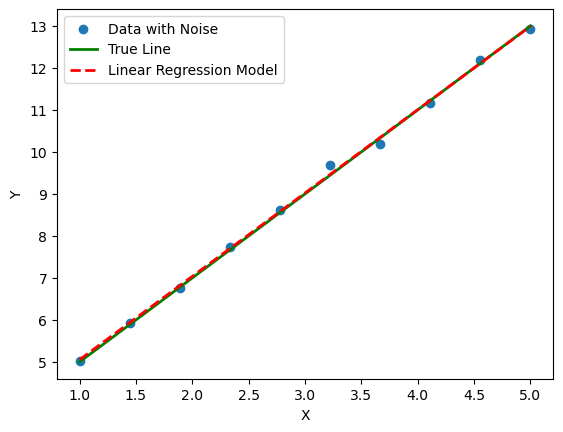

In [ ]:

np.random.seed(1358)

n_sample = 10
x = np.linspace(1, 5, n_sample)
e = 0.1 * np.random.randn(n_sample)

theta_0_true = 3
theta_1_true = 2

# generating y with noise
y_true = theta_0_true + theta_1_true * x
y = y_true + e

X = np.concatenate((np.ones((n_sample, 1)), np.expand_dims(x, axis=1)), axis=1)

# estimating parameters using the least squares method
theta_hat = np.linalg.lstsq(X, y, rcond=None)[0]
theta_0_hat, theta_1_hat = theta_hat

print("Estimated Parameters:")
print("Theta_0 =", theta_0_hat)
print("Theta_1 =", theta_1_hat)

# ploting the true data and the linear regression model
plt.scatter(x, y, label='Data with Noise')
plt.plot(x, y_true, label='True Line', color='green', linewidth=2)
plt.plot(x, theta_0_hat + theta_1_hat * x, label='Linear Regression Model', color='red', linestyle='dashed', linewidth=2)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

TASK 3

Estimated Parameters:
Theta_0 = 2.999999999999955
Theta_1 = 2.000000000000003
Theta_2 = -2.220446049250313e-16


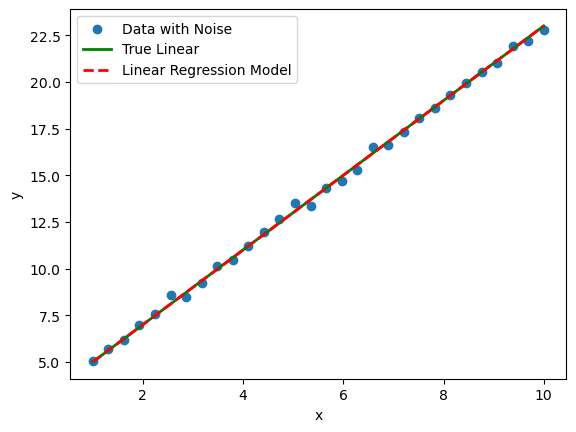

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1358)

n_sample = 30
x = np.linspace(1, 10, n_sample)
e = 0.2 * np.random.randn(n_sample)

theta_0_true = 3
theta_1_true = 2

y_true_linear = theta_0_true + theta_1_true * x

x_squared = x**2

X = np.concatenate((np.ones((n_sample, 1)), np.expand_dims(x, axis=1), np.expand_dims(x_squared, axis=1)), axis=1)

theta_hat = np.linalg.lstsq(X, y_true_linear, rcond=None)[0]

theta_0_hat, theta_1_hat, theta_2_hat = theta_hat

print("Estimated Parameters:")
print("Theta_0 =", theta_0_hat)
print("Theta_1 =", theta_1_hat)
print("Theta_2 =", theta_2_hat)

plt.scatter(x, y_true_linear + e, label='Data with Noise')
plt.plot(x, y_true_linear, label='True Linear', color='green', linewidth=2)
plt.plot(x, theta_0_hat + theta_1_hat * x + theta_2_hat * x_squared, label='Linear Regression Model', color='red', linestyle='dashed', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### Assignment for "Calculus for Machine Learning"

This task is associated with the "Insufficient" criterion in ILO 7.0. 

You need to complete with the [Differential Calculus](https://www.khanacademy.org/math/differential-calculus) course in Khan Academy and provide a link to the PDF file of certificate of completion you have put in your personal GitHub repository.

In [ ]:
# A link to the certificate of completion 
# permalink to the PDF file in my personal reposototry in the folder "Deliverables": https://github.com/BredaUniversityADSAI/2023-24b-fai1-adsai-VictoriaVicheva233182/blob/a268c9057b9acb3a1b36c19c8856a341ebdcafcc/Deliverables/CalMacLea_233182.pdf

### Assignment for "DataLab: Python for Symbolic Mathematics"

This task is associated with the "Insufficient" criterion in ILO 7.0. 

You need to complete all the DataLab tasks (Tasks 1-5) at the end of [this page](https://adsai.buas.nl/Study%20Content/Advanced%20Python/28.SymbolicMathematicsDataLab.html). Provide your codes in the following cell.

In [ ]:
from sympy import symbols, expand,Eq, solve, sin, limit

# Define symbolic variable
x, y = symbols('x y')

# Definition of the expression
ex1 = 2 * x**2 - x * y + 3
ex1


2*x**2 - x*y + 3

In [ ]:
ex2 = (x * ex1 + (2 * x + y)) / (x**2 + y)
ex2

(x*(2*x**2 - x*y + 3) + 2*x + y)/(x**2 + y)

In [ ]:
expand(ex2)

2*x**3/(x**2 + y) - x**2*y/(x**2 + y) + 5*x/(x**2 + y) + y/(x**2 + y)

In [ ]:
ex2.evalf(subs={x:-2, y:1})

-5.80000000000000

#### Solving a simple equation:

In [ ]:

# Define the variable
equation = Eq(2*x + 5, 11)

# Solve the equation
solution = solve(equation, x)

# Print the solution
print("Solution:", solution)

Solution: [3]


#### Solveing simultaneous equations

In [ ]:
# Define the variables
x, y = symbols('x y')

# Define the system of equations
equation1 = Eq(2*x + y, 5)
equation2 = Eq(x - 2*y, 15)

# Define the system of equations
system_of_equations = [equation1, equation2]

# Solve the system of equations
solution = solve(system_of_equations, (x, y))

# Display the solution
print("Solution:", solution)

Solution: {x: 5, y: -5}


#### Limit Computation

In [ ]:
# Define the function
f = sin(x) / x

# calculate the limit as x approaches 0
lim_result = limit(f, x, 0)
lim_result

1

#### Derivative Computation

In [ ]:
from sympy import symbols, diff, sin

# Define the variable 
x = symbols('x')

# Define the function
f = x**3 + 3 * x**2 + sin(x)

# Calculate the derivative
der_f = diff(f, x)

# Print the derivative
print(der_f)


3*x**2 + 6*x + cos(x)


## Least Squares Problem

In [ ]:
import sympy as sp

# Sample data points
data_points = [(1, 2), (2, 3), (3, 4), (4, 5)]

# Variables for the linear equation: y = mx + c
m, c = sp.symbols('m c')

# Sum of squared differences between observed and predicted y-values
error = sum((m * x + c - y)**2 for x, y in data_points)

# Finding partial derivatives of the error function with respect to m and c
partial_m = sp.diff(error, m)
partial_c = sp.diff(error, c)

# Solving the system of equations to minimize the error (least squares solution)
solution = sp.solve((partial_m, partial_c), (m, c))

best_fit_m, best_fit_c = solution[m], solution[c]

print("Best fit line equation: y =", best_fit_m, "* x +", best_fit_c)

Best fit line equation: y = 1 * x + 1


# Task 2

Text(0, 0.5, 'y')

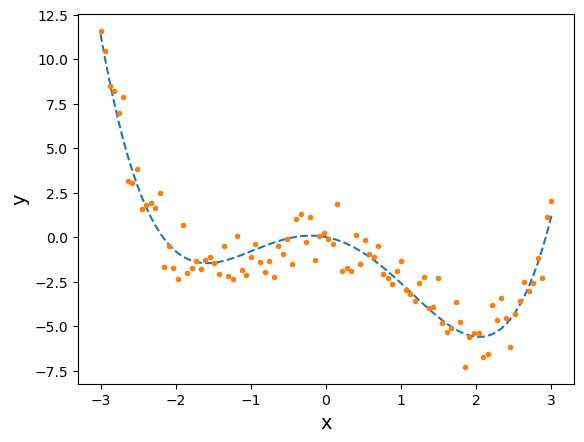

In [ ]:
np.random.seed(1358)
x = np.linspace(-3,3, 100)
y_true = 0.3 * x**4 -0.1 * x**3 - 2* x**2 - 0.8*x
y = y_true + np.random.randn(len(x))
plt.plot(x,y_true, '--')
plt.plot(x,y, '.')
plt.xlabel('x', size=14)
plt.ylabel('y', size=14)

In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Linear Model:
Optimized Parameters: a0 = -1.0655175923470526, a1 = -1.317458960917759

Quadratic Model:
Optimized Parameters: a0 = -2.3219376538207976, a1 = -1.317458956915198, a2 = 0.4105134891586605

Cubic Model:
Optimized Parameters: a0 = -2.321937641209323, a1 = -0.5218266729783664, a2 = 0.41051348401982735, a3 = -0.14444096279240048

Quartic Model:
Optimized Parameters: a0 = -0.1855039198767491, a1 = -0.5218266649955136, a2 = -1.9173825392232975, a3 = -0.14444096498764583, a4 = 0.2958874126228353

Quintic Model:
Optimized Parameters: a0 = -0.18550349277560477, a1 = -0.26534211356220294, a2 = -1.9173827522213334, a3 = -0.2748951721244513, a4 = 0.2958874333424287, a5 = 0.012794773500932522


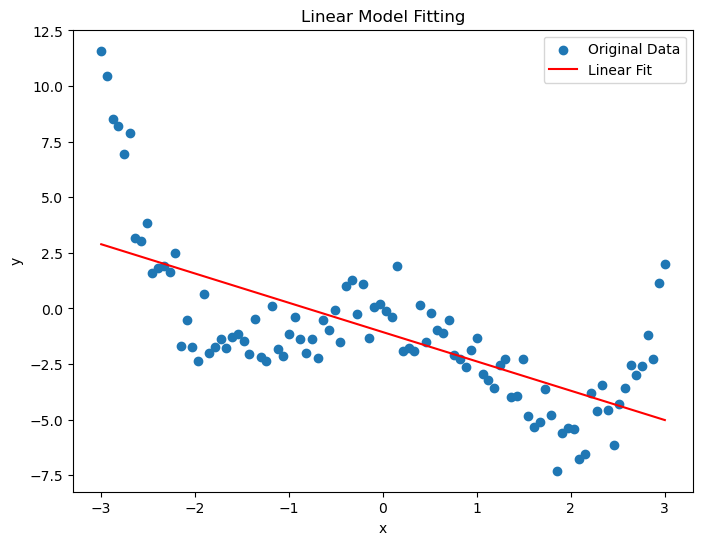

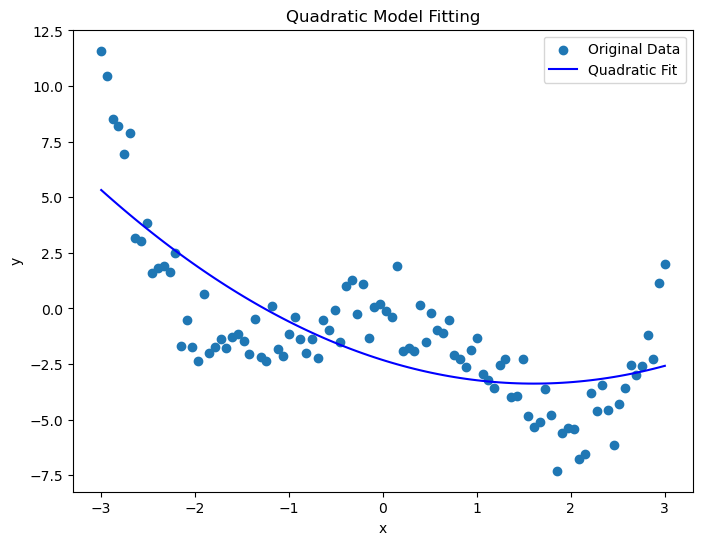

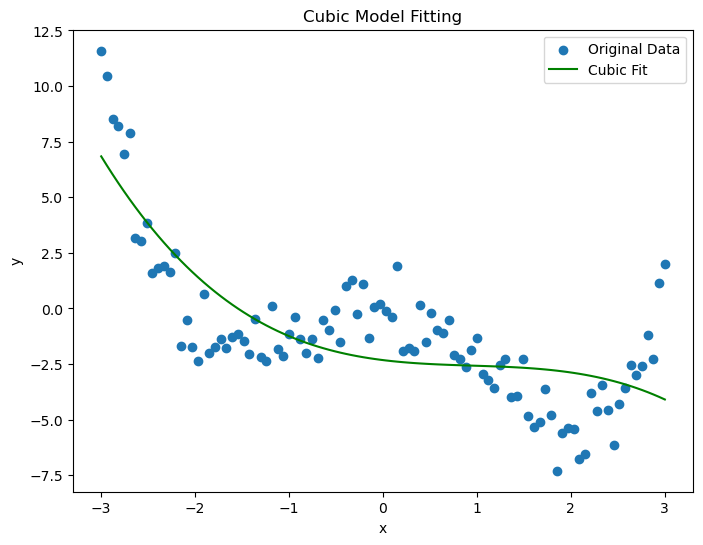

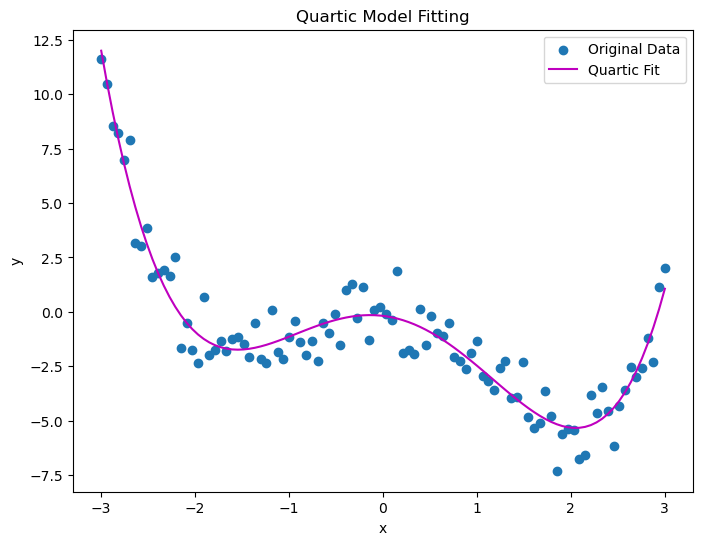

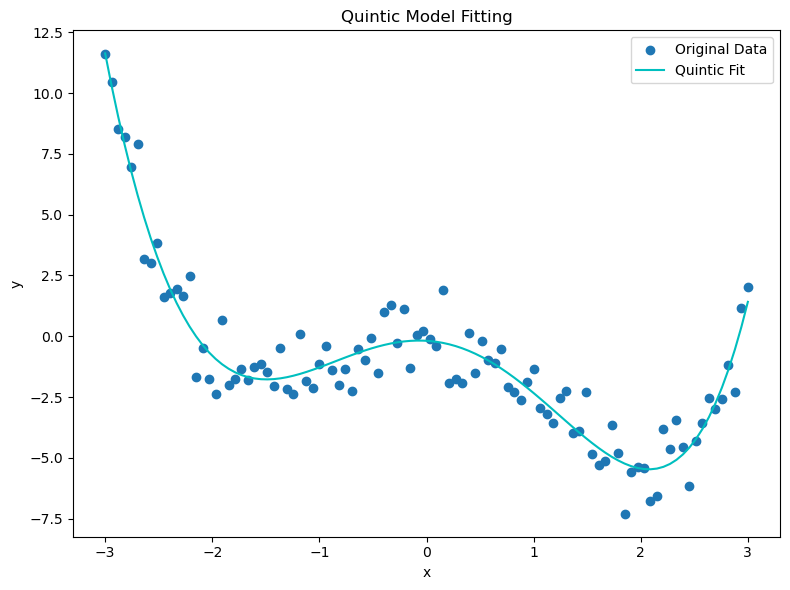

In [ ]:
def linear_model(x, a0, a1):
    return a0 + a1 * x

def quadratic_model(x, a0, a1, a2):
    return a0 + a1 * x + a2 * x**2

def cubic_model(x, a0, a1, a2, a3):
    return a0 + a1 * x + a2 * x**2 + a3 * x**3

def quartic_model(x, a0, a1, a2, a3, a4):
    return a0 + a1 * x + a2 * x**2 + a3 * x**3 + a4 * x**4

def quintic_model(x, a0, a1, a2, a3, a4, a5):
    return a0 + a1 * x + a2 * x**2 + a3 * x**3 + a4 * x**4 + a5 * x**5

np.random.seed(1358)
x = np.linspace(-3, 3, 100)
y_true = 0.3 * x**4 - 0.1 * x**3 - 2 * x**2 - 0.8 * x
y_data = y_true + np.random.randn(len(x))

popt_linear, _ = curve_fit(linear_model, x, y_data)

popt_quadratic, _ = curve_fit(quadratic_model, x, y_data)

popt_cubic, _ = curve_fit(cubic_model, x, y_data)

popt_quartic, _ = curve_fit(quartic_model, x, y_data)

popt_quintic, _ = curve_fit(quintic_model, x, y_data)

x_fit = np.linspace(min(x), max(x), 100)
y_linear_fit = linear_model(x_fit, *popt_linear)
y_quadratic_fit = quadratic_model(x_fit, *popt_quadratic)
y_cubic_fit = cubic_model(x_fit, *popt_cubic)
y_quartic_fit = quartic_model(x_fit, *popt_quartic)
y_quintic_fit = quintic_model(x_fit, *popt_quintic)

print("Linear Model:")
a0_linear, a1_linear = popt_linear
print(f"Optimized Parameters: a0 = {a0_linear}, a1 = {a1_linear}")

print("\nQuadratic Model:")
a0_quadratic, a1_quadratic, a2_quadratic = popt_quadratic
print(f"Optimized Parameters: a0 = {a0_quadratic}, a1 = {a1_quadratic}, a2 = {a2_quadratic}")

print("\nCubic Model:")
a0_cubic, a1_cubic, a2_cubic, a3_cubic = popt_cubic
print(f"Optimized Parameters: a0 = {a0_cubic}, a1 = {a1_cubic}, a2 = {a2_cubic}, a3 = {a3_cubic}")

print("\nQuartic Model:")
a0_quartic, a1_quartic, a2_quartic, a3_quartic, a4_quartic = popt_quartic
print(f"Optimized Parameters: a0 = {a0_quartic}, a1 = {a1_quartic}, a2 = {a2_quartic}, a3 = {a3_quartic}, a4 = {a4_quartic}")

print("\nQuintic Model:")
a0_quintic, a1_quintic, a2_quintic, a3_quintic, a4_quintic, a5_quintic = popt_quintic
print(f"Optimized Parameters: a0 = {a0_quintic}, a1 = {a1_quintic}, a2 = {a2_quintic}, a3 = {a3_quintic}, a4 = {a4_quintic}, a5 = {a5_quintic}")

plt.figure(figsize=(8, 6))
plt.scatter(x, y_data, label='Original Data')
plt.plot(x_fit, y_linear_fit, 'r-', label='Linear Fit')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Model Fitting')

plt.figure(figsize=(8, 6))
plt.scatter(x, y_data, label='Original Data')
plt.plot(x_fit, y_quadratic_fit, 'b-', label='Quadratic Fit')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Quadratic Model Fitting')

plt.figure(figsize=(8, 6))
plt.scatter(x, y_data, label='Original Data')
plt.plot(x_fit, y_cubic_fit, 'g-', label='Cubic Fit')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cubic Model Fitting')

plt.figure(figsize=(8, 6))
plt.scatter(x, y_data, label='Original Data')
plt.plot(x_fit, y_quartic_fit, 'm-', label='Quartic Fit')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Quartic Model Fitting')

plt.figure(figsize=(8, 6))
plt.scatter(x, y_data, label='Original Data')
plt.plot(x_fit, y_quintic_fit, 'c-', label='Quintic Fit')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Quintic Model Fitting')

plt.tight_layout()
plt.show()


Which model fits best with data set x, y?
- The Quartic is the best-fitting one, but also the Quintic one


How do you compare the models?
- Though they lack descriptive power, the linear and quadratic models were able to accurately depict the general direction of the data distribution. The lowest least squares values, on the other hand, belong to Quartic and Quintic, who were able to fit the data quite well. This is evident in this particular situation.

## Task 3

In [ ]:
x = sp.symbols('x')
y = x**2 + 2*x + 1

dy_dx = sp.diff(y, x)

d2y_dx2 = sp.diff(dy_dx, x)

print("First Derivative (dy/dx):", sp.pretty(dy_dx))
print("\nSecond Derivative (d^2y/dx^2):", sp.pretty(d2y_dx2))


First Derivative (dy/dx): 2⋅x + 2

Second Derivative (d^2y/dx^2): 2


In [ ]:

x = sp.symbols('x')
y = (3*x - 5)**3

dy_dx = sp.diff(y, x)

d2y_dx2 = sp.diff(dy_dx, x)

print("First Derivative (dy/dx):", dy_dx)
print("\nSecond Derivative (d^2y/dx^2):", sp.pretty(d2y_dx2))

First Derivative (dy/dx): 9*(3*x - 5)**2

Second Derivative (d^2y/dx^2): 162⋅x - 270


In [ ]:

x = sp.symbols('x')
y = (sp.sqrt(x) - 1)**2 - (x**2 + 1)**4

dy_dx = sp.diff(y, x)
d2y_dx2 = sp.diff(dy_dx, x)

print("First Derivative (dy/dx):\n", dy_dx)
print("\nSecond Derivative (d^2y/dx^2):\n",d2y_dx2)

First Derivative (dy/dx):
 -8*x*(x**2 + 1)**3 + (sqrt(x) - 1)/sqrt(x)

Second Derivative (d^2y/dx^2):
 -48*x**2*(x**2 + 1)**2 - 8*(x**2 + 1)**3 + 1/(2*x) - (sqrt(x) - 1)/(2*x**(3/2))


In [ ]:
x = sp.symbols('x')
y = 7*sp.cot(x) - 8*sp.acos(x)

dy_dx = sp.diff(y, x)

d2y_dx2 = sp.diff(dy_dx, x)

print("First Derivative (dy/dx):", dy_dx)
print("\nSecond Derivative (d^2y/dx^2):", d2y_dx2)

First Derivative (dy/dx): -7*cot(x)**2 - 7 + 8/sqrt(1 - x**2)

Second Derivative (d^2y/dx^2): 8*x/(1 - x**2)**(3/2) - 7*(-2*cot(x)**2 - 2)*cot(x)


In [ ]:
x = sp.symbols('x')
y = (x**2 * sp.ln(x)) / (1 - sp.atan(x))

dy_dx = sp.diff(y, x)
d2y_dx2 = sp.diff(dy_dx, x)

print("First Derivative (dy/dx):\n", dy_dx)
print("\nSecond Derivative (d^2y/dx^2):\n", d2y_dx2)

First Derivative (dy/dx):
 x**2*log(x)/((1 - atan(x))**2*(x**2 + 1)) + 2*x*log(x)/(1 - atan(x)) + x/(1 - atan(x))

Second Derivative (d^2y/dx^2):
 -2*x**3*log(x)/((1 - atan(x))**2*(x**2 + 1)**2) + 2*x**2*log(x)/((1 - atan(x))**3*(x**2 + 1)**2) + 4*x*log(x)/((1 - atan(x))**2*(x**2 + 1)) + 2*x/((1 - atan(x))**2*(x**2 + 1)) + 2*log(x)/(1 - atan(x)) + 3/(1 - atan(x))


### Assignment for "Multivariable Calculus"

This task is associated with the "Insufficient" criterion in ILO 7.0. You need to complete the assignments 1-4 at the end of [this page](https://adsai.buas.nl/Study%20Content/Advanced%20Python/27.MultivariableCalculus.html)

Provide a link to a PDF file, for assignments 1-3 in the following cell. 

In [ ]:
# A link to a PDF file for assignments 1-3: https://github.com/BredaUniversityADSAI/2023-24b-fai1-adsai-VictoriaVicheva233182/blob/a268c9057b9acb3a1b36c19c8856a341ebdcafcc/Deliverables/MulCalAss_233182.pdf

Put your code  for assignment 4 in the following cell.

In [ ]:
import numpy as np

# defining the function
def f(x, y):
    return x**2 + y**2

# defining the directional derivative function
def directional_derivative(f, x, y, dx, dy):
    df_dx = (f(x + dx, y) - f(x, y)) / dx
    df_dy = (f(x, y + dy) - f(x, y)) / dy
    return df_dx + df_dy

# defining the point and the direction
x0, y0 = 1, 2
dx, dy = 0.01, 0.01

# calculating the directional derivative
approx_dd = directional_derivative(f, x0, y0, dx, dy)
print("Approximated directional derivative:", approx_dd)

# approaching zero using a for loop
for i in range(1, 6):
    h = 10**(-i)
    approx_dd_h = directional_derivative(f, x0, y0, h, h)
    print(f"For h = {h}: Approximated directional derivative:", approx_dd_h)


Approximated directional derivative: 6.019999999999914
For h = 0.1: Approximated directional derivative: 6.200000000000001
For h = 0.01: Approximated directional derivative: 6.019999999999914
For h = 0.001: Approximated directional derivative: 6.001999999999619
For h = 0.0001: Approximated directional derivative: 6.000200000011446
For h = 1e-05: Approximated directional derivative: 6.000020000040962


### Assignments for "Optimization Algorithms"

This task is associated with the "Sufficient" criterion in ILO 7.0. 

Complete the assignments at the end of [this page](https://adsai.buas.nl/Study%20Content/Advanced%20Python/29.OptimizationAlgorithms.html). Then put your code in the following cell.

ASSIGNMENT 1

This is a template for **Assignment 1** of **Optimization and Linear Regression using Gradient Descent** (Monday of Week 8). 

Fill in the **None** part in this template. Feel free to add more cells to this notebook to perform all the tasks that you are asked to do.

The goal is to find the minimum of the following function:

$$f(x) =  0.3x^4 - 0.1x^3 - 2x^2 - 0.8x$$

using the Gradient Descent algorithm.

In [ ]:
# Put your code here (1 line of code)
# Import matplotlib.pyplot
import matplotlib.pyplot as plt


### Initilization

Consider an initial value for $𝑥$. You can initiate the Gradient Descent algorithm from any arbitrary starting point.

In [ ]:
# Put your code here (1 line of code)
# Consider an initial value for x
x = 3

###  Define function
Define the following function

f(x) =  0.3x^4 - 0.1x^3 - 2x^2 - 0.8x$$

You are tasked with finding the minimum for this function.

In [ ]:
from scipy.optimize import minimize

def objective_function(x):
    return 0.3 * x**4 - 0.1 * x**3 - 2 * x**2 - 0.8 * x


result = minimize(objective_function, x, method='BFGS')

minimum_value = result.fun
minimizer_value = result.x[0]

print(f"Minimum value: {minimum_value}")
print(f"Value of x at the minimum: {minimizer_value}")


Minimum value: -5.6085143557597235
Value of x at the minimum: 2.0421368433437657


In [ ]:
def my_fun(x):
    # x (a scalar value): input value to your function
    
    # Output
    # y (scalar value): output of the function
    
    # Put your code here (1 line of code)
    y = 0.3 * x**4 - 0.1 * x**3 - 2 * x**2 - 0.8 * x
    
    return y


**Test your my_fun**:

To ensure that you have implemented *my_fun(.)* correctly, run the following cell and compare the output with the expected value.

In [ ]:
my_fun(-2)

-0.8000000000000003

The expected output is: -0.800

### Compute the gradient of the function

To implement the Gradient Descent algorithm, you need to compute the derivative of the related function. 

Now, compute the derivative of the mathematical function

$$ f(x) = 0.3x^4 -0.1x^3 -2x^2 -0.8x$$

and implement the following function for computing the derivative of this function:

In [ ]:
def grad_fun(x):
    # x (a scalar value): input to the derivative function
    # y (output of the derivative function)
    
    # Put your code here (1 line of code)
    y = 1.2 * x**3 - 0.3 * x**2 - 4 * x - 0.8
    
    return y

**Test grad_fun**:

Now, to ensure that you have computed and implemented the derivative function correctly, run the following cell and compare the result with the provided expected value.

In [ ]:
grad_fun(0.5)

-2.725

The expected output is: -2.725

### Implement Gradient Descent Update Rule

In this section, you need to implement the gradient descent update rule as follows:

$$x_{n+1} = x_n - \gamma \nabla f(x_n)$$

To execute this step, utilize the **grad_fun** that you have already implemented.

In [ ]:
def grad_descent_step(x, alf):
    # x (a scalar value): the current value of x
    # alf (a scalar value): learning rate
    # x_new: the new value for x
    
    # Put your code here (1 line of code)
    x_new = x - alf * grad_fun(x)
    
    return x_new


**Test grad_descent_step function**:

Now, test your implemented Gradient Descent update rule by running the following cell and comparing the result with the expected value.

In [ ]:
grad_descent_step(2.5, 0.1)

1.8925

The expected ouptput is: 1.8925

### Implement Gradient Descent Algorithm

Now, you can implement the Gradient Descent algorithm using the previously developed functions, enabling you to complete the assignment by finding the optimal value of x and minimizing the function.

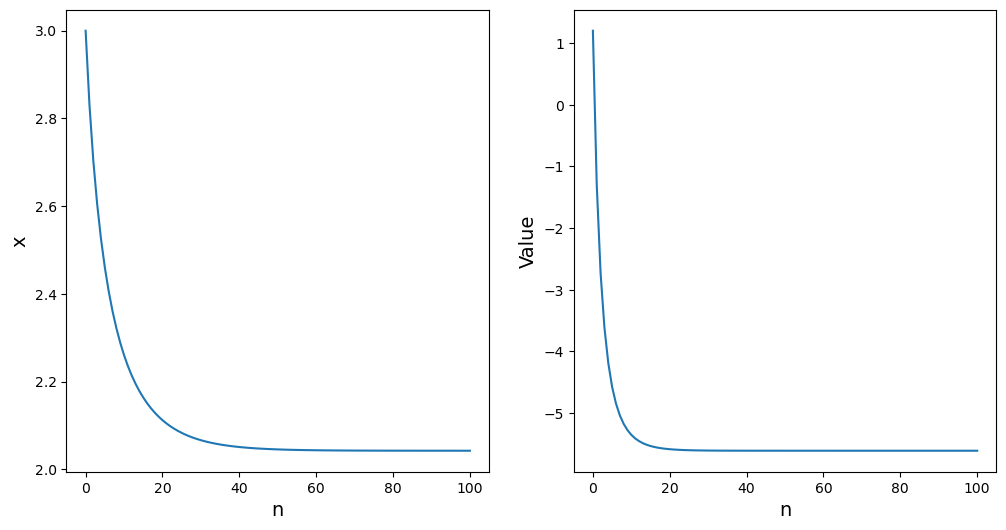

In [ ]:
# Choose an initial value for x
x_init = 3

# Choose the learning rate
gam = 0.01

# Choose the number of iterations
N = 100

# Save the values for x and function value
X = [x_init]

# Save the function value at x_init
FUN_VAL = [my_fun(x_init)]

for n in range(N):
    # Call the grad_descent_step
    x_new = grad_descent_step(X[-1], gam)
    
    # Save the obtained value x_new in the list X (use append method)
    X.append(x_new)
    
    # Save the function value at point x_new (use append method)
    FUN_VAL.append(my_fun(x_new))

# Plot the results
fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].plot(range(N+1), X)
ax[0].set_xlabel('n', size=14)
ax[0].set_ylabel('x', size=14)

ax[1].plot(range(N+1), FUN_VAL)
ax[1].set_xlabel('n', size=14)
ax[1].set_ylabel('Value', size=14)

plt.show()


**The optimal value for x**:

In [ ]:
# Put your code here (1 line of code)
# Define the optimal value for x
x_opt = X[-1]

print("The optimal value of x is:", x_opt)


The optimal value of x is: 2.0421542733452553


**The minimum value of the function**:

In [ ]:
# Put your code here (1 line of code)
# Define the minimum value of the function at optimal point x_opt
min_val = FUN_VAL[-1]

print("The minimum value of f is:", min_val)


The minimum value of f is: -5.608514354276746


## Check the Result

Eventually, to ensure that you have implemented the Gradient Descent algorithm correctly, you can obtain the minimum value of the function using Python's capabilities.

You can check the Gradient Descent algorithm output by comparing the results obtained by the 'fmin' function from SciPy as follows:

In [ ]:
from scipy.optimize import fmin

minimum = fmin(my_fun, 3)

Optimization terminated successfully.
         Current function value: -5.608514
         Iterations: 16
         Function evaluations: 32


In [ ]:
print("The optimal value for x is:", minimum[0])

The optimal value for x is: 2.0421386718749974


ASSIGNMENT 2

## Implement Gradient Descent Algorithm for House Price Prediction

This is a template for Assignment 2 of **Optimization and Linear Regression using Gradient Descent** (Monday of Week 8).

Fill in the **None** part in this template. Feel free to add more cells to this notebook to perform all the tasks that you are asked to do.

The goal in this assignment is to build a linear regression model to predict the house price based on its size.

In [ ]:
# Put your code here (3 lines of code)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Put your code here (1 line of code)
# Load the datase

data = pd.read_csv( 'house-prices.csv')

In [ ]:
# Put your code here (1 line of code)
# Take a look at the data, use head method for data
print(data.head())


   Home   Price  SqFt  Bedrooms  Bathrooms  Offers Brick Neighborhood
0     1  114300  1790         2          2       2    No         East
1     2  114200  2030         4          2       3    No         East
2     3  114800  1740         3          2       1    No         East
3     4   94700  1980         3          2       3    No         East
4     5  119800  2130         3          3       3    No         East


In [ ]:
# Select the size and price values from the dataset and assign them to 
# variables X and Y
X_dat = data['SqFt'].to_numpy()
Y_dat = data['Price'].to_numpy()

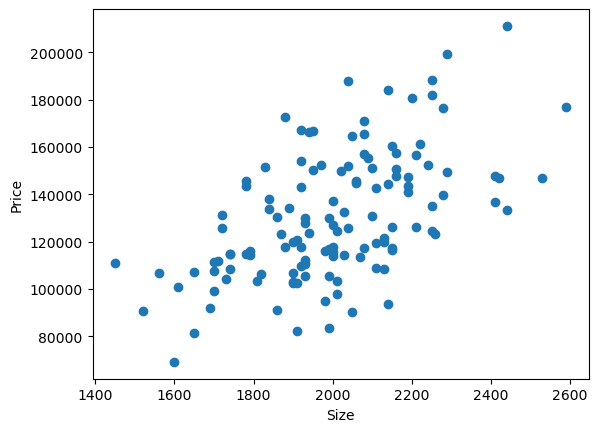

In [ ]:
# Put your code here (1 line of code)
# Plot a scatter plot for X_dat and Y_dat
# Take alook at our data
plt.scatter(X_dat, Y_dat)

plt.xlabel('Size')
plt.ylabel('Price')
plt.show()

It is always good practice to normalize our data to increase the convergence rate of the Gradient Descent algorithm.

In [ ]:
# Normalize our data
X = (np.max(X_dat) - X_dat)/(np.max(X_dat) - np.min(X_dat)) 
Y = (np.max(Y_dat) - Y_dat)/(np.max(Y_dat) - np.min(Y_dat)) 

Now that our data is prepared, let's start creating the necessary functions to implement the Gradient Descent algorithm.

### Linear Regression Model

At first step, we need to define our linear regression model. The model is as follows:

$$y=wx+b$$

In [ ]:
# Define the linear regression model
def LR_model(x, w, b):
    # x: a scalar value, the size of the house
    # w: the weight of the model, a scalar value
    # b: the intercept of the model, a scalar value
    
    # Put your code here (1 line of code)
    # Define the linear regression model
    y = w * x + b
    
    return y

### Cost Function

Now, we need to define the cost function. The cost function is a mean squared error function. 

The mean squared error cost function for our linear regression can be formulated as:

$$J(w,b)=\dfrac{1}{2m} \sum_{i=1}^{m} {\left(\hat y^{(i)} - y^{(i)}\right)^2}= \dfrac{1}{2m} \sum_{i=1}^{m} {\left(wx+b - y^{(i)}\right)^2}$$


In [ ]:
# Implement the cost function (mean squared error function)
def cost(X, Y, w, b):
    # X: a vector contains the size of the houses
    # Y: a vector contains the price of the houses
    # w: weight of the linear regression model
    # b: intercept of the model
    
    # Number of the observations
    m = len(X)
    
    # Initialize the sum as zero 
    J = 0
    
    for i in range(m):
        x = X[i]
        y = Y[i]
        
        # Use LR_model to compute the prediction of the price based on the size
        y_pred = LR_model(x, w, b)
        
        # Compute the cost function (mean squared error cost function)
        J += (y_pred - y) ** 2
    
    # Calculate the mean squared error
    J = J / (2 * m)
    
    return J


To make sure that you have correctly implemented the cost function, run the following cell and compare the obtained result with the given value. 

In [ ]:
# Use your function to compute the cost for the following values
cost(X, Y, 2, 3)

6.050766241298438

The expected value is: 6.050766241298438

### Gradient Descent Update Rule

Now you need to implement the Gradient Descent update rule as follows:

$$ \qquad \left\{ \begin{array}{l} w_{n+1} = w_{n} -  \dfrac{\alpha}{m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right)x^{(i)} \\ b_{n+1} = b_{n} -  \dfrac{\alpha}{m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right) \end{array} \right.$$


Here, $\alpha$ is the learning rate, $m$ is the number of the observations. Note that you are able to compute $\hat{y}^{(i)}$ using your previously developed function **LR_model**.

In [ ]:
# Implement the Gradient Descent update rule
def grad_descent_step(X, Y, w, b, alf):
    # X: a vector contains the size of the houses
    # Y: a vector contains the price of the houses
    # w: weight of the linear regression model
    # b: intercept of the model
    # alf: learning rate (a scalar value)
    
    # Number of the observations
    m = len(X)
    
    # Initialize both sum_w and sum_b as zero
    sum_w = 0
    sum_b = 0
    
    # A for loop to compute the sums appear in the update rule
    for i in range(m):
        x = X[i]
        y = Y[i]
        
        # Use your LR_model to compute a prediction with x, w, b
        y_pred = LR_model(x, w, b)
        
        # Compute the sums appear in the update rule
        sum_w += (y_pred - y) * x
        sum_b += (y_pred - y)
    
    # Implement the update rule for the gradient descent
    w_new = w - (alf / m) * sum_w
    b_new = b - (alf / m) * sum_b
    
    return w_new, b_new


Now that you have implemented the Gradient Descent update rule, to ensure its correctness, run the following cell and compare your result with the provided one.

In [ ]:
grad_descent_step(X, Y, 2, -3, 0.01)

(2.0126078237441893, -2.97465021756207)

The expected values are as follows:
    
(2.0126078237441893, -2.97465021756207)

### Implement Gradient Descent Algorithm

Now, it is time to implement the Gradient Descent algorithm using your already developed functions.

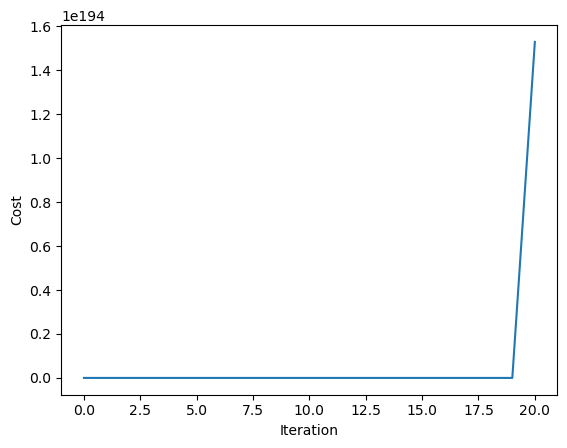

In [ ]:
# Choose an initial value for w
w_init = 3

# Choose an initial value for b
b_init = 3

# Choose the learning rate
alf = 0.01

# Choose the number of iterations
N = 20

# Save the values for w, b
W = np.zeros(N + 1)
B = np.zeros(N + 1)
C = np.zeros(N + 1)

# Save initial values
W[0] = w_init
B[0] = b_init

# Save the cost for w_init and b_init using cost function
C[0] = cost(X_dat, Y_dat, w_init, b_init)

# A loop to iteratively apply the update rule 
for n in range(N):
    
    # Use grad_descent_step function to find new values for w, b
    w_new, b_new = grad_descent_step(X_dat, Y_dat, W[n], B[n], alf)
    
    # Save the new values for w and b 
    W[n+1] = w_new
    B[n+1] = b_new
    
    # Save the cost value for the new values of w and b 
    # Use the cost function you have already implemented
    C[n+1] = cost(X_dat, Y_dat, w_new, b_new)

# Plot the results
plt.plot(range(N+1), C)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()


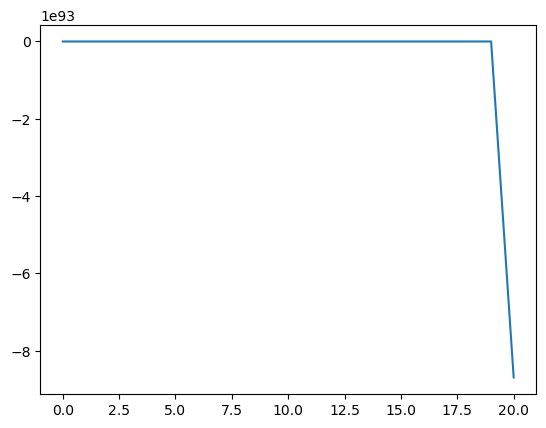

In [ ]:
# Put your code here (1 line of code)
# Plot the saved values of W against the iteration.
plt.plot(range(N + 1), W)

plt.show()

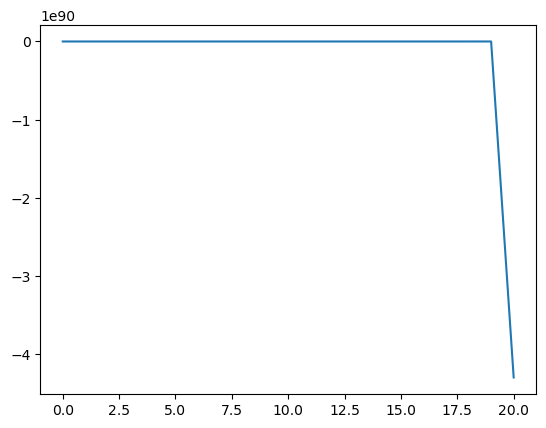

In [ ]:
# Put your code here (1 line of code)
# Plot the saved values of B against the iteration.
plt.plot(range(N + 1), B)

plt.show()

In [ ]:
# Define the final values (optimal values) of w and b
w_opt = W[-1]
b_opt = B[-1]

print("The optimal value for w:", w_opt)
print("The optimal value for b:", b_opt)


The optimal value for w: -8.68956334578135e+93
The optimal value for b: -4.29510092374665e+90


Since we initially normalized the data, in this section, we inverse the normalization to represent the model using the initial values of the data.

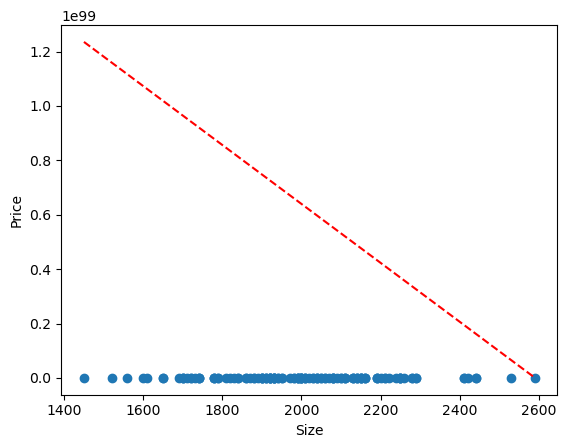

In [ ]:
X_max = np.max(X_dat)
X_min = np.min(X_dat)

Y_max = np.max(Y_dat)
Y_min = np.min(Y_dat)

X_line = np.linspace(X_min, X_max, 100)
Y_line_norm = w_opt * (X_max - X_line)/(X_max - X_min) + b_opt
Y_line = Y_max - Y_line_norm * (Y_max - Y_min) 
plt.plot(X_line,Y_line, 'r--')


plt.scatter(X_dat,Y_dat)

plt.xlabel('Size')
plt.ylabel('Price')
plt.show() 

### Compare with Scikit-learn

Congratulations! You have finished building a linear regression model from scratch. Perhaps you are curious to compare your model with the one obtained using the Scikit-learn package. In what follows, you will train the same model using Scikit-learn, and you can compare your model with that one.

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X.reshape(-1,1), Y)

In [ ]:
print("The optimal value for w:", reg.coef_)

The optimal value for w: [0.563392]


In [ ]:
print("The optimal value for b:", reg.intercept_)

The optimal value for b: 0.2773044733289968


If your model is significantly different from that of Scikit-learn, try to fine-tune the hyperparameters in your algorithm, such as the learning rate and the number of iterations. You should aim to achieve similar results.

Good Luck!

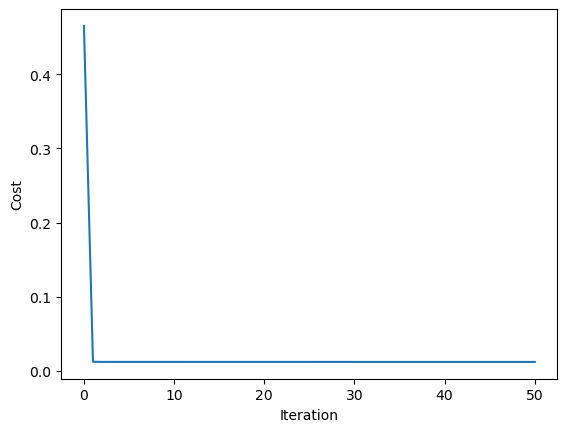

Optimal value for w: 0.5773410915257299
Optimal value for b: 0.2698980584960238


In [ ]:
# Choose an initial value for w
w_init = 1

# Choose an initial value for b
b_init = 1

# Choose the learning rate
alf = 0.8

# Choose the number of iterations
N = 50

X = (np.max(X_dat) - X_dat)/(np.max(X_dat) - np.min(X_dat))
Y = (np.max(Y_dat) - Y_dat)/(np.max(Y_dat) - np.min(Y_dat))

# Save the values for w, b
W = np.zeros(N + 1)
B = np.zeros(N + 1)
C = np.zeros(N + 1)

# Save initial values
W[0] = w_init
B[0] = b_init

# Save the cost for w_init and b_init using cost function
C[0] = cost(X, Y, w_init, b_init)

# A loop to iteratively apply the update rule
for n in range(N):
    
    # Use grad_descent_step function to find new values for w, b
    w_new, b_new = grad_descent_step(X, Y, W[n], B[n], alf)
    
    # Save the new values for w and b
    W[n+1] = w_new
    B[n+1] = b_new
    
    # Save the cost value for the new values of w and b
    # Use the cost function you have already implemented
    C[n+1] = cost(X, Y, w_new, b_new)

# Plot the results
plt.plot(range(N+1), C)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()

# Output the optimal values for w and b
print("Optimal value for w:", W[-1])
print("Optimal value for b:", B[-1])


DO TUK

### Assignments for "DataLab: Linear Regression with Gradient Descent"

This task is associated with the "Good" and "Excellent" criteria in ILO 7.0. 

Complete the assignment at the end of [this page](https://adsai.buas.nl/Study%20Content/Advanced%20Python/30.LinearRegressionGradientDescentDataLab.html). Then put your code in the following cell.

In [ ]:
# Put your code here